<a href="https://colab.research.google.com/github/linneverh/Sust-Finance/blob/main/assignment_1_finance_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment: Portfolio Allocation based on Financial Performance

In [1]:
# Import packages

# installing PyPortfolioOpt
!pip install pyportfolioopt
!pip install cvxpy

# installing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import yfinance as yf
import scipy.optimize as sco
import scipy.interpolate as sci
import matplotlib.pyplot as plt
import cvxpy as cp
from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt import risk_models
from pypfopt import expected_returns
from datetime import datetime, timedelta
from scipy.optimize import minimize
from pypfopt.objective_functions import portfolio_return

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 1.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 220.1/220.1 kB 8.8 MB/s eta 0:00:00


In [2]:
#import dataset from git
url_DS_ESGScore_Y = 'https://raw.githubusercontent.com/linneverh/Sust-Finance/refs/heads/main/DS_ESGScore_Y.csv'
DS_ESGScore_Y = pd.read_csv(url_DS_ESGScore_Y)

url_DS_EScore_Y = 'https://raw.githubusercontent.com/linneverh/Sust-Finance/refs/heads/main/DS_EScore_Y.csv'
DS_EScore_Y = pd.read_csv(url_DS_EScore_Y)

url_DS_MV_USD_M = 'https://raw.githubusercontent.com/linneverh/Sust-Finance/refs/heads/main/DS_MV_USD_M.csv'
DS_MV_USD_M = pd.read_csv(url_DS_MV_USD_M)

url_DS_MV_USD_Y = 'https://raw.githubusercontent.com/linneverh/Sust-Finance/refs/heads/main/DS_MV_USD_Y.csv'
DS_MV_USD_Y = pd.read_csv(url_DS_MV_USD_M)

url_DS_REV_USD_Y = 'https://raw.githubusercontent.com/linneverh/Sust-Finance/refs/heads/main/DS_REV_USD_Y.csv'
DS_REV_USD_Y = pd.read_csv(url_DS_REV_USD_Y)

url_DS_RI_USD_M = 'https://raw.githubusercontent.com/linneverh/Sust-Finance/refs/heads/main/DS_RI_USD_M.csv'
DS_RI_USD_M = pd.read_csv(url_DS_RI_USD_M)

url_DS_RI_USD_Y = 'https://raw.githubusercontent.com/linneverh/Sust-Finance/refs/heads/main/DS_RI_USD_Y.csv'
DS_RI_USD_Y = pd.read_csv(url_DS_RI_USD_M)

url_Risk_Free_Rate = 'https://raw.githubusercontent.com/linneverh/Sust-Finance/refs/heads/main/Risk_Free_Rate.csv'
Risk_Free_Rate = pd.read_csv(url_Risk_Free_Rate)

url_Static = 'https://raw.githubusercontent.com/linneverh/Sust-Finance/refs/heads/main/Static.csv'
Static = pd.read_csv(url_Static)


<ipython-input-2-c9f8fe89ee9e>:9: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  DS_MV_USD_M = pd.read_csv(url_DS_MV_USD_M)
<ipython-input-2-c9f8fe89ee9e>:12: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  DS_MV_USD_Y = pd.read_csv(url_DS_MV_USD_M)


### Test data sets

In [3]:
DS_ESGScore_Y.head()

NAME          ISIN  1999  2000  2001   2002  \
0                        SCHLUMBERGER  AN8068571086   NaN   NaN   NaN  45.63   
1                               ALUAR  ARALUA010258   NaN   NaN   NaN    NaN   
2                BANCO BBVA ARGENTINA  ARP125991090   NaN   NaN   NaN    NaN   
3  TERNIUM ARGENTINA SOCIEDAD ANONIMA  ARSIDE010029   NaN   NaN   NaN    NaN   
4                          STRABAG SE  AT000000STR1   NaN   NaN   NaN    NaN   

    2003   2004   2005   2006  ...   2014   2015   2016   2017   2018   2019  \
0  38.22  28.43  28.74  44.83  ...  57.07  55.50  69.43  68.12  71.38  71.32   
1    NaN    NaN    NaN    NaN  ...    NaN    NaN    NaN  13.39  10.77  13.69   
2    NaN    NaN    NaN    NaN  ...    NaN    NaN  42.63  61.57  76.33  77.40   
3    NaN    NaN    NaN    NaN  ...    NaN    NaN  41.27  45.71  45.15  44.16   
4    NaN    NaN    NaN    NaN  ...  50.04  51.45  53.53  63.88  70.02  69.13   

    2020   2021   2022   2023  
0  71.02  77.28  76.14  74.04  
1  13.88  15.60  14.29  28.84  
2  72.25  83.24  80.37  81.20  
3  43.86  43.77  46.04  59.77  
4  67.10  70.65  69.79  67.15  

[5 rows x 27 columns]

In [4]:
DS_EScore_Y.head()

NAME          ISIN  1999  2000  2001   2002  \
0                        SCHLUMBERGER  AN8068571086   NaN   NaN   NaN  53.65   
1                               ALUAR  ARALUA010258   NaN   NaN   NaN    NaN   
2                BANCO BBVA ARGENTINA  ARP125991090   NaN   NaN   NaN    NaN   
3  TERNIUM ARGENTINA SOCIEDAD ANONIMA  ARSIDE010029   NaN   NaN   NaN    NaN   
4                          STRABAG SE  AT000000STR1   NaN   NaN   NaN    NaN   

    2003  2004  2005  2006  ...   2014   2015   2016   2017   2018   2019  \
0  23.33   0.0   0.0  40.7  ...  75.71  71.54  73.65  85.28  81.96  80.74   
1    NaN   NaN   NaN   NaN  ...    NaN    NaN    NaN  15.82  13.26  12.26   
2    NaN   NaN   NaN   NaN  ...    NaN    NaN  51.51  56.64  76.16  84.68   
3    NaN   NaN   NaN   NaN  ...    NaN    NaN  32.51  33.47  33.72  33.41   
4    NaN   NaN   NaN   NaN  ...  48.69  55.55  56.98  58.90  64.85  62.56   

    2020   2021   2022   2023  
0  79.07  88.53  86.85  82.05  
1  11.05  13.19  12.21  17.65  
2  82.48  88.36  86.99  79.68  
3  33.52  38.37  36.83  48.05  
4  59.32  59.27  65.77  59.45  

[5 rows x 27 columns]

In [5]:
DS_MV_USD_M.head()

NAME          ISIN 1999-12-31 00:00:00  \
0                        SCHLUMBERGER  AN8068571086            30859.99   
1                               ALUAR  ARALUA010258             1129.31   
2                BANCO BBVA ARGENTINA  ARP125991090              1656.3   
3  TERNIUM ARGENTINA SOCIEDAD ANONIMA  ARSIDE010029             1414.37   
4                          STRABAG SE  AT000000STR1                 NaN   

   2000-01-31 00:00:00  2000-02-29 00:00:00  2000-03-31 00:00:00  \
0             33574.85             40611.13             43352.43   
1              1328.64              1395.07              1362.23   
2              1570.39              1851.34              1656.82   
3              1407.47              1463.08              1460.01   
4                  NaN                  NaN                  NaN   

   2000-04-28 00:00:00  2000-05-31 00:00:00  2000-06-30 00:00:00  \
0             43387.86             41861.39             42466.02   
1              1340.19              1317.78              1209.89   
2              1388.70              1352.22              1541.05   
3              1356.04               893.05               955.70   
4                  NaN                  NaN                  NaN   

   2000-07-31 00:00:00  ...  2024-04-30 00:00:00  2024-05-31 00:00:00  \
0             42074.79  ...             67864.94             65592.31   
1              1395.69  ...              2698.60              3165.16   
2              1551.54  ...              2435.11              3210.54   
3               990.45  ...              4340.63              5146.56   
4                  NaN  ...              5043.53              5210.65   

   2024-06-28 00:00:00  2024-07-31 00:00:00  2024-08-30 00:00:00  \
0             67436.13             68571.81             62465.84   
1              3033.34              2875.18              2694.70   
2              2818.34              2409.49              2832.34   
3              4829.15              4589.92              3971.89   
4              4935.22              4950.74              5129.83   

   2024-09-30 00:00:00  2024-10-31 00:00:00  2024-11-29 00:00:00  \
0             59239.83             56585.01             62050.05   
1              2494.63              2381.96              2635.60   
2              2697.85              3274.73              3745.74   
3              3870.75              3641.89              4278.73   
4              4947.90              4652.68              4819.74   

   2024-12-31 00:00:00  2025-01-31 00:00:00  
0             53708.59             54774.95  
1              2425.22              2291.70  
2              4516.58              5131.45  
3              3903.71              3645.50  
4              4835.47              5800.59  

[5 rows x 304 columns]

## Question 1: Average annualized return and volatiliy (10 points)

Compute the annualized average return and annualized volatility for all individual assets over the period 2014–2024 based on monthly data. Plot and comment the histogram of these distributions. Compute and comment on the correlation between individual average returns and volatilities in the cross section. (10 points)


In [6]:
#CLEANING/MERGING

# Merging the data to filter per region
merged_DS_RI_USD_M = pd.merge(DS_RI_USD_M, Static, on='ISIN', how='inner')
merged_DS_RI_USD_M = merged_DS_RI_USD_M[['ISIN', 'Name', 'Country', 'Region'] + [col for col in merged_DS_RI_USD_M.columns if col not in ['ISIN', 'Name', 'Country', 'Region']]]
del(merged_DS_RI_USD_M['NAME'])

#Keeping only the columns between 30/01/04 and 31/12/24
start_date = pd.to_datetime('2003-12-31')
end_date = pd.to_datetime('2024-12-31')

# Filter columns excluding non-date columns
date_columns = [col for col in merged_DS_RI_USD_M.columns if col not in ['ISIN', 'Name', 'Country', 'Region'] and start_date <= pd.to_datetime(col, errors='ignore') <= end_date]
selected_columns = ['ISIN', 'Name', 'Country', 'Region'] + date_columns
merged_DS_RI_USD_M = merged_DS_RI_USD_M[selected_columns]
#merged_DS_RI_USD_M.head()


# Filter on EM countries
EM_merged_DS_RI_USD_M = merged_DS_RI_USD_M[merged_DS_RI_USD_M['Region'] == 'EM']
EM_merged_DS_RI_USD_M.head()



<ipython-input-6-764e14df1c49>:13: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_datetime without passing `errors` and catch exceptions explicitly instead
  date_columns = [col for col in merged_DS_RI_USD_M.columns if col not in ['ISIN', 'Name', 'Country', 'Region'] and start_date <= pd.to_datetime(col, errors='ignore') <= end_date]


ISIN                                Name Country Region  \
1    ARALUA010258                               ALUAR      AR     EM   
2    ARP125991090                BANCO BBVA ARGENTINA      AR     EM   
3    ARSIDE010029  TERNIUM ARGENTINA SOCIEDAD ANONIMA      AR     EM   
118  BMG211591018              CHINA YURUN FOOD GROUP      CN     EM   
146  BRABEVACNOR1                            AMBEV ON      BR     EM   

     2003-12-31 00:00:00  2004-01-30 00:00:00  2004-02-27 00:00:00  \
1                2369.57              2580.96              2512.72   
2                 164.57               169.65               168.24   
3                 239.35               219.84               262.63   
118                  NaN                  NaN                  NaN   
146               170.08               171.72               191.03   

     2004-03-31 00:00:00  2004-04-30 00:00:00  2004-05-31 00:00:00  ...  \
1                2555.21              2286.66              1990.69  ...   
2                 168.11               132.82               103.71  ...   
3                 249.92               239.81               201.36  ...   
118                  NaN                  NaN                  NaN  ...   
146               249.73               272.12               287.41  ...   

     2024-03-29 00:00:00  2024-04-30 00:00:00  2024-05-31 00:00:00  \
1                5760.96              5331.65              6253.43   
2                 412.77               458.42               672.82   
3                1182.67              1092.52              1295.37   
118                 0.63                 0.59                 0.59   
146              1199.78              1127.14              1057.57   

     2024-06-28 00:00:00  2024-07-31 00:00:00  2024-08-30 00:00:00  \
1                5993.00              5680.53              5323.94   
2                 624.64               569.69               669.66   
3                1215.48              1155.27               999.71   
118                 0.56                 0.51                 0.59   
146               987.73               985.01              1091.85   

     2024-09-30 00:00:00  2024-10-31 00:00:00  2024-11-29 00:00:00  \
1                4928.66              4706.05              5207.18   
2                 637.87               774.26               885.63   
3                 974.26               916.65              1076.94   
118                 0.62                 0.80                 0.67   
146              1154.89              1049.92              1025.18   

     2024-12-31 00:00:00  
1                4802.89  
2                1067.88  
3                 982.55  
118                 0.63  
146               963.62  

[5 rows x 257 columns]

In [7]:
#RETURNS TABLE

#MONTHLY RETURNS TABLE
# idea: for annualized, sum up all months r and divide by the total number of months, multiply by 12
# for the other: annualized volatility, same thing with volatility

# Filter columns for 2014-2024
start_year = pd.to_datetime('2003-12-31')
end_year = pd.to_datetime('2024-12-31')

# Select columns within the desired date range for returns calculation
date_columns_filtered = [col for col in EM_merged_DS_RI_USD_M.columns[4:]
                         if start_year <= pd.to_datetime(col, errors='coerce') <= end_year
                         and pd.notna(pd.to_datetime(col, errors='coerce'))]  # Check for valid dates

EM_merged_DS_R_USD_M = EM_merged_DS_RI_USD_M[['ISIN', 'Name', 'Country', 'Region'] + date_columns_filtered].copy()  # Create a copy to avoid modifying the original

# Get the date columns for calculations
date_columns = EM_merged_DS_RI_USD_M.columns[4:]  # Assuming the date columns start from index 6

# Iterate through the date columns and calculate simple returns
for i in range(len(date_columns_filtered)-1):
    current_date = date_columns_filtered[i]
    next_date = date_columns_filtered[i + 1]
    # Check if the current_date value is 0
    EM_merged_DS_R_USD_M[next_date] = np.where(EM_merged_DS_RI_USD_M[current_date] != 0,#CLEANING OF THE INFINITE VALUES

                                              (EM_merged_DS_RI_USD_M[next_date] - EM_merged_DS_RI_USD_M[current_date]) / EM_merged_DS_RI_USD_M[current_date],
                                              0)  # Set return rate to 0 if current_date is 0

#Checking if the column to be dropped is present in EM_merged_DS_R_USD_M
if date_columns_filtered:
    EM_merged_DS_R_USD_M = EM_merged_DS_R_USD_M.drop(columns=[date_columns_filtered[0]])

# Now EM_merged_DS_R_USD_M contains the simple returns
EM_merged_DS_R_USD_M.head()

ISIN                                Name Country Region  \
1    ARALUA010258                               ALUAR      AR     EM   
2    ARP125991090                BANCO BBVA ARGENTINA      AR     EM   
3    ARSIDE010029  TERNIUM ARGENTINA SOCIEDAD ANONIMA      AR     EM   
118  BMG211591018              CHINA YURUN FOOD GROUP      CN     EM   
146  BRABEVACNOR1                            AMBEV ON      BR     EM   

     2004-01-30 00:00:00  2004-02-27 00:00:00  2004-03-31 00:00:00  \
1               0.089210            -0.026440             0.016910   
2               0.030868            -0.008311            -0.000773   
3              -0.081512             0.194642            -0.048395   
118                  NaN                  NaN                  NaN   
146             0.009643             0.112451             0.307282   

     2004-04-30 00:00:00  2004-05-31 00:00:00  2004-06-30 00:00:00  ...  \
1              -0.105099            -0.129433            -0.009585  ...   
2              -0.209922            -0.219169            -0.056407  ...   
3              -0.040453            -0.160335            -0.031585  ...   
118                  NaN                  NaN                  NaN  ...   
146             0.089657             0.056188             0.049650  ...   

     2024-03-29 00:00:00  2024-04-30 00:00:00  2024-05-31 00:00:00  \
1               0.121748            -0.074521             0.172888   
2               0.322091             0.110594             0.467693   
3               0.158254            -0.076226             0.185672   
118            -0.045455            -0.063492             0.000000   
146            -0.014473            -0.060544            -0.061723   

     2024-06-28 00:00:00  2024-07-31 00:00:00  2024-08-30 00:00:00  \
1              -0.041646            -0.052139            -0.062774   
2              -0.071609            -0.087971             0.175481   
3              -0.061673            -0.049536            -0.134653   
118            -0.050847            -0.089286             0.156863   
146            -0.066038            -0.002754             0.108466   

     2024-09-30 00:00:00  2024-10-31 00:00:00  2024-11-29 00:00:00  \
1              -0.074246            -0.045166             0.106486   
2              -0.047472             0.213821             0.143841   
3              -0.025457            -0.059132             0.174865   
118             0.050847             0.290323            -0.162500   
146             0.057737            -0.090892            -0.023564   

     2024-12-31 00:00:00  
1              -0.077641  
2               0.205786  
3              -0.087646  
118            -0.059701  
146            -0.060048  

[5 rows x 256 columns]

In [8]:
#AVERAGE YEARLY RETURNS

# Filter columns for 2014-2024
start_year = pd.to_datetime('2014-01-31')
end_year = pd.to_datetime('2024-12-31')

# Select columns within the desired date range for returns calculation
date_columns_filtered = [col for col in EM_merged_DS_R_USD_M.columns[4:]
                         if start_year <= pd.to_datetime(col, errors='coerce') <= end_year
                         and pd.notna(pd.to_datetime(col, errors='coerce'))]  # Check for valid dates

EM_merged_DS_R_USD_M_AYR = EM_merged_DS_R_USD_M[['ISIN', 'Name', 'Country', 'Region'] + date_columns_filtered].copy()  # Create a copy to avoid modifying the original

# Calculate the mean of every data point for each company (row) across all columns
EM_merged_DS_R_USD_M_AYR['Annualized Average Return'] = EM_merged_DS_R_USD_M_AYR.iloc[:, 4:].mean(axis=1) * 12

# Display the updated DataFrame
EM_merged_DS_R_USD_M_AYR.head()

ISIN                                Name Country Region  \
1    ARALUA010258                               ALUAR      AR     EM   
2    ARP125991090                BANCO BBVA ARGENTINA      AR     EM   
3    ARSIDE010029  TERNIUM ARGENTINA SOCIEDAD ANONIMA      AR     EM   
118  BMG211591018              CHINA YURUN FOOD GROUP      CN     EM   
146  BRABEVACNOR1                            AMBEV ON      BR     EM   

     2014-01-31 00:00:00  2014-02-28 00:00:00  2014-03-31 00:00:00  \
1               0.022384            -0.149263            -0.018792   
2              -0.037527             0.014524             0.118945   
3               0.028548            -0.081548             0.023276   
118            -0.083601             0.028655            -0.148380   
146            -0.081488             0.087626             0.039537   

     2014-04-30 00:00:00  2014-05-30 00:00:00  2014-06-30 00:00:00  ...  \
1               0.017829             0.025300            -0.020969  ...   
2               0.159405             0.079927             0.128727  ...   
3               0.109948            -0.009297            -0.058221  ...   
118            -0.066756            -0.056509            -0.019712  ...   
146            -0.021640            -0.030519             0.011256  ...   

     2024-04-30 00:00:00  2024-05-31 00:00:00  2024-06-28 00:00:00  \
1              -0.074521             0.172888            -0.041646   
2               0.110594             0.467693            -0.071609   
3              -0.076226             0.185672            -0.061673   
118            -0.063492             0.000000            -0.050847   
146            -0.060544            -0.061723            -0.066038   

     2024-07-31 00:00:00  2024-08-30 00:00:00  2024-09-30 00:00:00  \
1              -0.052139            -0.062774            -0.074246   
2              -0.087971             0.175481            -0.047472   
3              -0.049536            -0.134653            -0.025457   
118            -0.089286             0.156863             0.050847   
146            -0.002754             0.108466             0.057737   

     2024-10-31 00:00:00  2024-11-29 00:00:00  2024-12-31 00:00:00  \
1              -0.045166             0.106486            -0.077641   
2               0.213821             0.143841             0.205786   
3              -0.059132             0.174865            -0.087646   
118             0.290323            -0.162500            -0.059701   
146            -0.090892            -0.023564            -0.060048   

     Annualized Average Return  
1                     0.232388  
2                     0.343283  
3                     0.237229  
118                  -0.139865  
146                  -0.036432  

[5 rows x 137 columns]

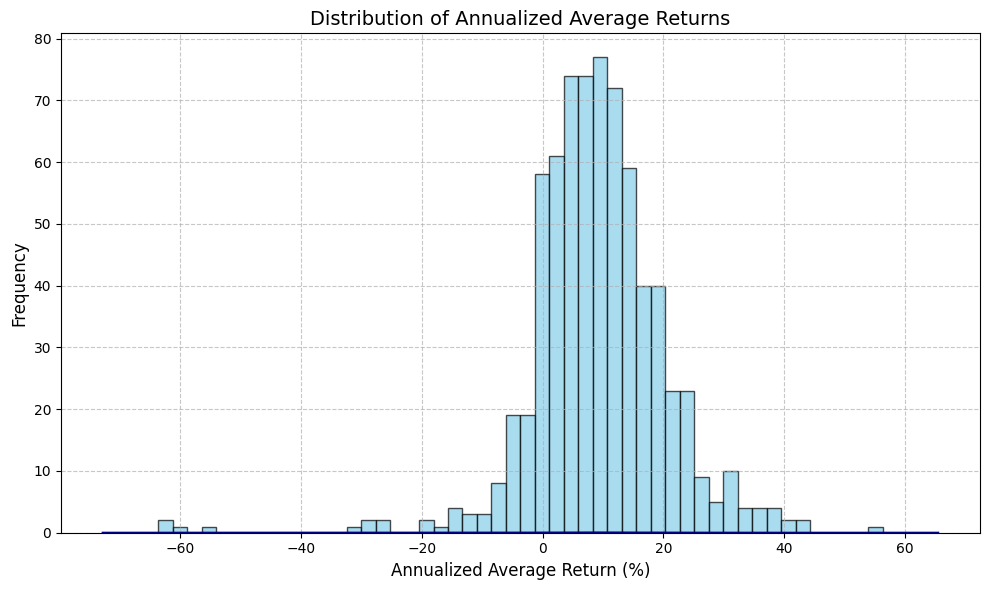

In [9]:
#HISTOGRAM AAR

# Drop rows with NaN values in 'Annualized Average Return'
EM_merged_DS_R_USD_M_AYR = EM_merged_DS_R_USD_M_AYR.dropna(subset=['Annualized Average Return'])

# Plot histogram with customizations
plt.figure(figsize=(10, 6))
plt.hist(EM_merged_DS_R_USD_M_AYR['Annualized Average Return'] * 100, bins=50,
         color='skyblue', edgecolor='black', alpha=0.7)
plt.xlabel('Annualized Average Return (%)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title('Distribution of Annualized Average Returns', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()

# Add KDE
sns.kdeplot(EM_merged_DS_R_USD_M_AYR['Annualized Average Return'] * 100, color='darkblue')

plt.show()

In [10]:
#VOLATILITY

T=120

# Calculate volatility for each asset
volatilities = []
for i in range(EM_merged_DS_R_USD_M_AYR.shape[0]): # Iterate using numerical index
    R_p_t = EM_merged_DS_R_USD_M_AYR.iloc[i, 4:].values  # Returns for the asset
    mu_p = np.mean(R_p_t)  # Mean return for the asset
    sigma = np.sqrt((1 / T) * np.sum((R_p_t - mu_p) ** 2))  # Volatility calculation
    volatilities.append(sigma)

# Add the volatility column to the DataFrame
EM_merged_DS_R_USD_M_AYR['Volatility'] = volatilities
EM_merged_DS_R_USD_M_AYR.head()

ISIN                                Name Country Region  \
1    ARALUA010258                               ALUAR      AR     EM   
2    ARP125991090                BANCO BBVA ARGENTINA      AR     EM   
3    ARSIDE010029  TERNIUM ARGENTINA SOCIEDAD ANONIMA      AR     EM   
118  BMG211591018              CHINA YURUN FOOD GROUP      CN     EM   
146  BRABEVACNOR1                            AMBEV ON      BR     EM   

     2014-01-31 00:00:00  2014-02-28 00:00:00  2014-03-31 00:00:00  \
1               0.022384            -0.149263            -0.018792   
2              -0.037527             0.014524             0.118945   
3               0.028548            -0.081548             0.023276   
118            -0.083601             0.028655            -0.148380   
146            -0.081488             0.087626             0.039537   

     2014-04-30 00:00:00  2014-05-30 00:00:00  2014-06-30 00:00:00  ...  \
1               0.017829             0.025300            -0.020969  ...   
2               0.159405             0.079927             0.128727  ...   
3               0.109948            -0.009297            -0.058221  ...   
118            -0.066756            -0.056509            -0.019712  ...   
146            -0.021640            -0.030519             0.011256  ...   

     2024-05-31 00:00:00  2024-06-28 00:00:00  2024-07-31 00:00:00  \
1               0.172888            -0.041646            -0.052139   
2               0.467693            -0.071609            -0.087971   
3               0.185672            -0.061673            -0.049536   
118             0.000000            -0.050847            -0.089286   
146            -0.061723            -0.066038            -0.002754   

     2024-08-30 00:00:00  2024-09-30 00:00:00  2024-10-31 00:00:00  \
1              -0.062774            -0.074246            -0.045166   
2               0.175481            -0.047472             0.213821   
3              -0.134653            -0.025457            -0.059132   
118             0.156863             0.050847             0.290323   
146             0.108466             0.057737            -0.090892   

     2024-11-29 00:00:00  2024-12-31 00:00:00  Annualized Average Return  \
1               0.106486            -0.077641                   0.232388   
2               0.143841             0.205786                   0.343283   
3               0.174865            -0.087646                   0.237229   
118            -0.162500            -0.059701                  -0.139865   
146            -0.023564            -0.060048                  -0.036432   

     Volatility  
1      0.172436  
2      0.198981  
3      0.169678  
118    0.187857  
146    0.092097  

[5 rows x 138 columns]

In [11]:
#HISTOGRAM FOR VOLATILITY

# Plot histogram
plt.figure(figsize=(10, 6))
plt.hist(EM_merged_DS_R_USD_M_AYR['Volatility'] * 100, bins=50,  # Increased bins to 50
         color='salmon', edgecolor='black', alpha=0.7)  # Added alpha for transparency
plt.xlabel('Annualized Volatility (%)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title('Distribution of Annualized Volatility', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()

# Add KDE
sns.kdeplot(EM_merged_DS_R_USD_M_AYR['Volatility'] * 100, color='darkred')  # Added KDE

plt.show()

Correlation between Annualized Average Return and Volatility: 0.056183772253159334


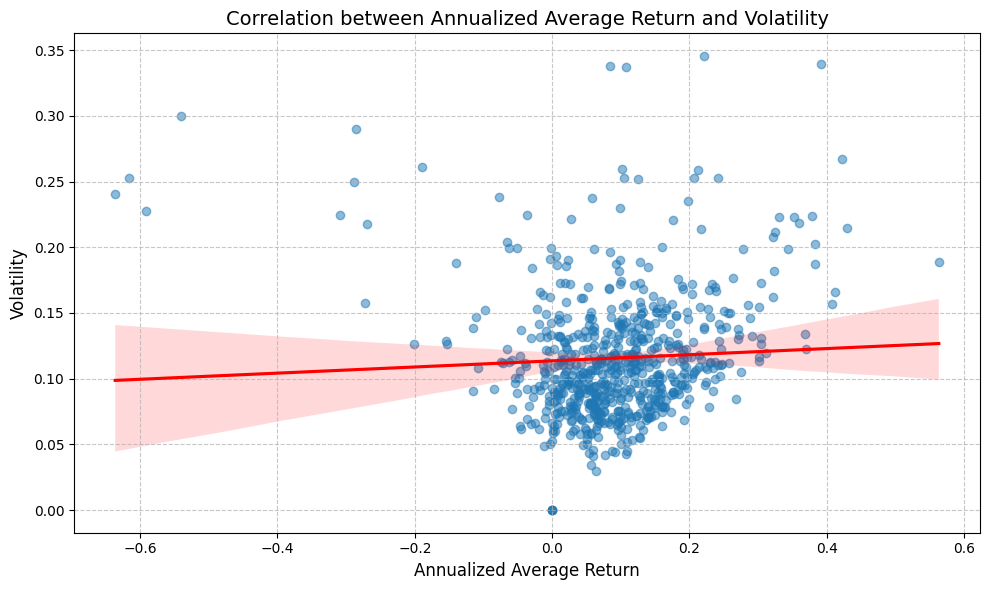

In [12]:
#CORRELATION AAR AND VOLATILITY

# Calculate the correlation
correlation = EM_merged_DS_R_USD_M_AYR['Annualized Average Return'].corr(EM_merged_DS_R_USD_M_AYR['Volatility'])

# Print the correlation
print(f"Correlation between Annualized Average Return and Volatility: {correlation}")

# Create a scatter plot with a correlation line using seaborn
plt.figure(figsize=(10, 6))
sns.regplot(x='Annualized Average Return', y='Volatility', data=EM_merged_DS_R_USD_M_AYR,
            scatter_kws={'alpha': 0.5}, line_kws={'color': 'red'})  # Add correlation line
plt.xlabel('Annualized Average Return', fontsize=12)
plt.ylabel('Volatility', fontsize=12)
plt.title('Correlation between Annualized Average Return and Volatility', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

## Question 2: Equally-weighted/market-cap (value) weighted portfolios (15 points)

### Risk free rate

In [13]:
Risk_Free_Rate.head()

Unnamed: 0    RF
0      200001  0.41
1      200002  0.43
2      200003  0.47
3      200004  0.46
4      200005  0.50

In [14]:
import calendar

df = Risk_Free_Rate.copy()

df[df.columns[0]] = df[df.columns[0]].astype(str)

# Extract year (first 4 characters) and month (characters 5-6)
df['Year'] = df.iloc[:, 0].str[:4].astype(int)
df['Month'] = df.iloc[:, 0].str[4:6].astype(int)  # Extract month

# Get the last day of the month using calendar.monthrange
df['LastDay'] = df.apply(lambda row: calendar.monthrange(row['Year'], row['Month'])[1], axis=1)
# Rename 'LastDay' to 'Day' for pd.to_datetime
df = df.rename(columns={'LastDay': 'Day'}) # Rename to 'Day' to match expected input for pd.to_datetime

# Now create the 'ReadableDate' column using the calculated LastDay
df['date'] = pd.to_datetime(df[['Year', 'Month', 'Day']]) # Use 'Day' instead of 'LastDay'

# Drop the temporary 'Year', 'Month', and 'Day' columns
df = df.drop(['Year', 'Month', 'Day', 'Unnamed: 0' ], axis=1)

df = df[['date', 'RF']]

df['date'] = pd.to_datetime(df['date'])
df['RF'] = df['RF'] / 100

#df["RF"] = (1 + df["RF"]) ** (1/12) - 1
#df['RF'] = df['RF'] / 12

risk_free_rate_df = df

risk_free_rate_df.tail(100)

date      RF
200 2016-09-30  0.0002
201 2016-10-31  0.0002
202 2016-11-30  0.0001
203 2016-12-31  0.0003
204 2017-01-31  0.0004
..         ...     ...
295 2024-08-31  0.0048
296 2024-09-30  0.0040
297 2024-10-31  0.0039
298 2024-11-30  0.0040
299 2024-12-31  0.0037

[100 rows x 2 columns]

### Region selection

In [15]:
region = 'EM'

### Simple returns

In [16]:
# Merging the data to filter per region
merged_DS_RI_USD_M = pd.merge(DS_RI_USD_M, Static, on='ISIN', how='inner')
merged_DS_RI_USD_M = merged_DS_RI_USD_M[['ISIN', 'Name', 'Country', 'Region'] + [col for col in merged_DS_RI_USD_M.columns if col not in ['ISIN', 'Name', 'Country', 'Region']]]
del(merged_DS_RI_USD_M['NAME'])
merged_DS_RI_USD_M.head(10)

# Filter on EM countries
EM_merged_DS_RI_USD_M = merged_DS_RI_USD_M[merged_DS_RI_USD_M['Region'] == region]

In [17]:
years = [str(year) for year in range(2013, 2024)]

# Select only the columns that are in the 'years' list
DS_ESGScore_Y_filtered = DS_ESGScore_Y[['NAME','ISIN', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022', '2023']]

In [18]:
# Make a copy to avoid modifying the original DataFrame directly
df_filled = DS_ESGScore_Y_filtered.copy()

# Identify the year columns (assuming they are strings representing years)
year_columns = sorted([col for col in df_filled.columns if col.isdigit()])

# Iterate through the year columns
for i in range(1, len(year_columns)):
    prev_year = year_columns[i-1]
    current_year = year_columns[i]

    # Create a mask to select rows where:
    # 1. The current year is NaN
    # 2. The previous year is NOT NaN
    # 3. The previous year's value is a float
    mask = (df_filled[current_year].isna()) & \
           (df_filled[prev_year].notna()) & \
           (df_filled[prev_year].apply(lambda x: isinstance(x, (int, float)))) #check if int or float (not only float)

    # Fill the NaN values in the current year with the previous year's float value
    df_filled.loc[mask, current_year] = df_filled.loc[mask, prev_year]

# Update DS_ESGScore_Y_filtered with the filled values
DS_ESGScore_Y_filtered = df_filled

In [19]:
DS_ESGScore_Y_filtered.shape

(2508, 13)

In [20]:
DS_ESGScore_Y_filtered = DS_ESGScore_Y_filtered.dropna()

In [21]:
DS_ESGScore_Y_filtered.shape

(2317, 13)

In [22]:
import pandas as pd
import numpy as np

# Assuming your DataFrame is named 'df'

# Check if there are any NaN values in the DataFrame
has_nan = DS_ESGScore_Y_filtered.isna().any().any()

if has_nan:
    print("The DataFrame still contains NaN values.")

    # Get the count of NaN values in each column
    nan_counts = DS_ESGScore_Y_filtered.isna().sum()

    # Display columns with NaN values and their counts
    print("\nColumns with NaN values:")
    for column, count in nan_counts[nan_counts > 0].items():
        print(f"{column}: {count} NaN values")

    # Get the total number of NaN values
    total_nan = DS_ESGScore_Y_filtered.isna().sum().sum()
    print(f"\nTotal number of NaN values: {total_nan}")

    # Optionally, you can display rows with NaN values
    rows_with_nan = DS_ESGScore_Y_filtered[DS_ESGScore_Y_filtered.isna().any(axis=1)]
    print("\nRows containing NaN values:")
    print(rows_with_nan)
else:
    print("The DataFrame does not contain any NaN values.")


The DataFrame does not contain any NaN values.


In [23]:
EM_merged_DS_RI_USD_M.shape

(710, 306)

In [24]:
EM_merged_DS_RI_USD_M = EM_merged_DS_RI_USD_M[EM_merged_DS_RI_USD_M['ISIN'].isin(DS_ESGScore_Y_filtered['ISIN'])]
EM_merged_DS_RI_USD_M.shape

(585, 306)

In [25]:
EM_merged_DS_RI_USD_M.columns = list(EM_merged_DS_RI_USD_M.columns[:4]) + list(pd.to_datetime(EM_merged_DS_RI_USD_M.columns[4:]))

start_date = pd.to_datetime('2013-12-31 00:00:00')
end_date = pd.to_datetime('2024-12-31 00:00:00')

EM_merged_DS_RI_USD_M_2014_2024 = EM_merged_DS_RI_USD_M.loc[:, start_date:end_date]

#EM_merged_DS_RI_USD_M_2014_2024 = pd.concat([EM_merged_DS_RI_USD_M.iloc[:, :4], EM_merged_DS_RI_USD_M_2014_2024], axis=1)

EM_merged_DS_RI_USD_M_2014_2024

2013-12-31  2014-01-31  2014-02-28  2014-03-31  2014-04-30  2014-05-30  \
118        18.66       17.10       17.59       14.98       13.98       13.19   
146      2413.60     2216.92     2411.18     2506.51     2452.27     2377.43   
147       586.09      488.82      505.41      585.72      607.19      590.46   
148      2057.95     1807.78     1961.79     2326.29     2505.91     2353.38   
149      5199.92     4485.87     4616.20     5043.88     5677.09     5400.01   
...          ...         ...         ...         ...         ...         ...   
2560      133.73      122.77      131.88      137.09      136.36      152.40   
2561      327.12      301.54      319.77      378.57      390.79      389.10   
2562       31.88       29.65       31.25       29.43       30.95       31.93   
2563       59.61       49.36       48.80       50.87       50.67       52.74   
2564      341.86      278.00      308.30      305.93      333.17      309.61   

      2014-06-30  2014-07-31  2014-08-29  2014-09-30  ...  2024-03-29  \
118        12.93       13.94       14.17       12.83  ...        0.63   
146      2404.19     2347.97     2473.31     2223.15  ...     1199.78   
147       663.78      720.25      923.06      616.28  ...     1272.70   
148      2464.89     2596.12     3109.24     2428.24  ...     1893.69   
149      6087.05     6202.06     6778.56     6020.11  ...      902.28   
...          ...         ...         ...         ...  ...         ...   
2560      151.61      149.66      148.46      133.89  ...      103.80   
2561      405.67      417.69      418.57      373.04  ...      373.17   
2562       34.00       32.65       31.92       25.91  ...       53.35   
2563       51.38       53.56       50.71       46.44  ...        0.05   
2564      313.39      345.03      363.42      329.91  ...        4.66   

      2024-04-30  2024-05-31  2024-06-28  2024-07-31  2024-08-30  2024-09-30  \
118         0.59        0.59        0.56        0.51        0.59        0.62   
146      1127.14     1057.57      987.73      985.01     1091.85     1154.89   
147      1190.47     1161.15     1109.30     1083.48     1164.81     1178.58   
148      1797.94     1607.05     1495.68     1489.17     1884.13     1854.74   
149       901.27      978.31     1129.50     1031.04     1281.75     1201.84   
...          ...         ...         ...         ...         ...         ...   
2560      108.05      121.84      131.64      173.36      175.55      184.07   
2561      386.72      396.75      434.53      439.89      495.99      531.01   
2562       59.43       61.64       62.37       70.16       53.12       56.97   
2563        0.05        0.05        0.06        0.08        0.09        0.09   
2564        5.19        5.25        8.50       11.15       12.60       14.14   

      2024-10-31  2024-11-29  2024-12-31  
118         0.80        0.67        0.63  
146      1049.92     1025.18      963.62  
147      1074.08      998.11      947.95  
148      1719.88     1477.92     1316.83  
149      1253.98     1177.39     1168.17  
...          ...         ...         ...  
2560      190.50      209.13      210.60  
2561      497.48      498.09      524.49  
2562       66.32       56.06       46.48  
2563        0.08        0.10        0.10  
2564       14.06       13.13       11.99  

[585 rows x 133 columns]

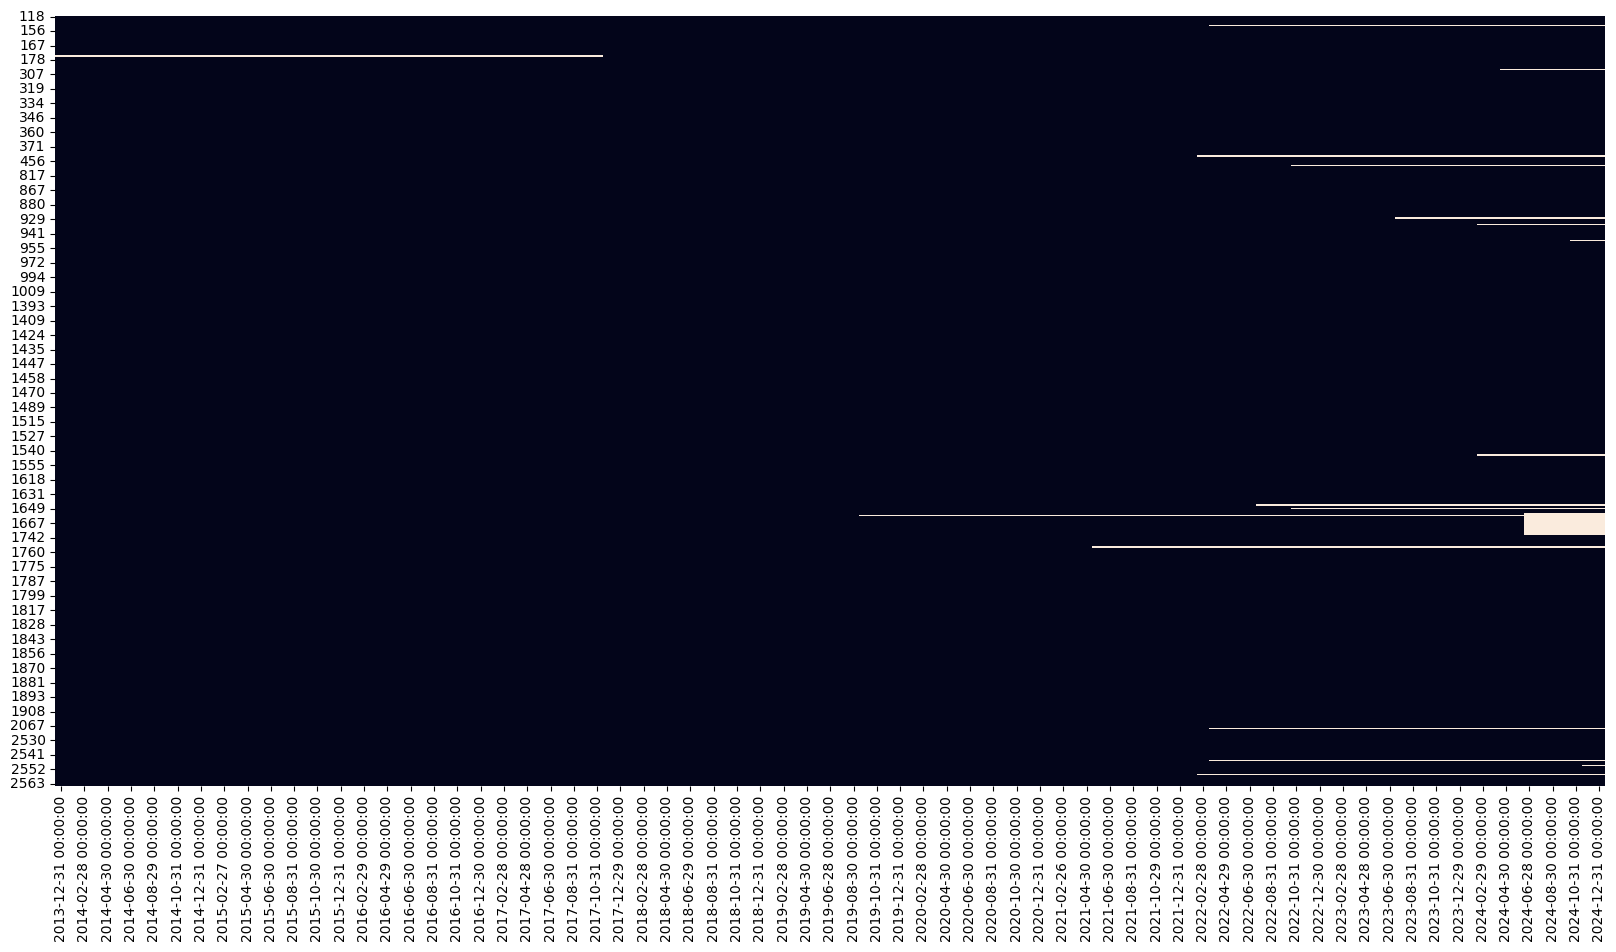

In [26]:
plt.figure(figsize=(20, 10))
sns.heatmap(EM_merged_DS_RI_USD_M_2014_2024.isnull(), cbar=False)
plt.show()

In [27]:
nan_rows = EM_merged_DS_RI_USD_M_2014_2024[EM_merged_DS_RI_USD_M_2014_2024.isnull().any(axis=1)]

nan_row_indices = nan_rows.index.tolist()

nan_row_indices

company_names = EM_merged_DS_RI_USD_M.loc[nan_row_indices, 'Name']

company_names

152     CMPH.ENGT.DE SAOP.B PN DEAD - DELIST.29/03/22
175                                         SUZANO ON
302                  AES ANDES DEAD - DELIST.18/04/24
378     TELF.O2 CZECH REPUBLIC DEAD - DELIST.25/02/22
722                   LAMPRELL DEAD - DELIST.25/10/22
928           HOUSING DEVELOPMENT FINANCE CORPORATION
934             RELIANCE CAPITAL SUSP - SUSP.29/02/24
946                       IDFC DEAD - DELIST.11/10/24
1544              UMW HOLDINGS DEAD - DELIST.19/02/24
1646               GRUPA LOTOS DEAD - DELIST.12/08/22
1649        POLISH OIL AND GAS DEAD - DELIST.18/11/22
1660                               MMC NORILSK NICKEL
1661                                         URALKALI
1662                                          GAZPROM
1663                                       ROSTELECOM
1664                                        NK LUKOIL
1665                               SBERBANK OF RUSSIA
1666                                          TATNEFT
1667                                        SEVERSTAL
1668                                     GAZPROM NEFT
1669                         MAGNITOGORSK IOSTL.WORKS
1670                                          TMK OAO
1671                                          NOVATEK
1672                                     SISTEMA JSFC
1673                                       OC ROSNEFT
1674                                         VTB BANK
1675                            FED.HYGN.CO. RUSHYDRO
1753          THAI AIRWAYS INTL. SUSP - SUSP.25/03/24
2319     NOVOLIPETSK STEEL GDR DEAD - DELIST.27/01/23
2545        IMPERIAL LOGISTICS DEAD - DELIST.15/03/22
2549                                 MURRAY & ROBERTS
2556          LIBERTY HOLDINGS DEAD - DELIST.01/03/22
Name: Name, dtype: object

In [28]:
# Filter out company names that do not contain "SUSP" or "DELIST"
filtered_indices = company_names[~company_names.str.contains("SUSP|DELIST", case=False, na=False)].index.tolist()

filtered_indices

[175,
 928,
 1660,
 1661,
 1662,
 1663,
 1664,
 1665,
 1666,
 1667,
 1668,
 1669,
 1670,
 1671,
 1672,
 1673,
 1674,
 1675,
 2549]

In [29]:
selected_rows = EM_merged_DS_RI_USD_M_2014_2024.loc[filtered_indices]
selected_rows

2013-12-31  2014-01-31  2014-02-28  2014-03-31  2014-04-30  2014-05-30  \
175          NaN         NaN         NaN         NaN         NaN         NaN   
928       725.10      728.27      746.08      835.33      840.28      837.49   
1660       72.88       67.75       73.82       74.04       79.72       84.71   
1661        5.01        4.65        4.38        4.57        4.23        4.26   
1662       54.00       52.72       49.54       49.32       46.21       51.99   
1663       24.84       23.10       20.26       17.22       15.82       17.47   
1664       95.46       86.87       84.01       85.78       81.13       86.83   
1665      324.56      283.52      267.42      251.41      214.46      255.56   
1666       57.79       50.64       53.60       51.91       52.05       52.88   
1667        6.32        5.23        5.38        4.93        4.54        5.49   
1668      174.42      155.90      154.22      159.08      150.92      156.23   
1669        1.54        1.36        1.19        1.10        1.12        1.32   
1670        1.38        1.30        1.21        1.05        0.94        1.10   
1671       46.21       42.53       43.54       38.02       36.94       40.94   
1672        4.37        3.78        3.65        3.25        3.34        3.99   
1673        4.22        3.84        3.74        3.68        3.44        3.57   
1674        0.74        0.63        0.58        0.55        0.53        0.67   
1675        0.87        0.79        0.78        0.80        0.79        0.99   
2549     3541.34     3071.99     3219.87     3234.46     3231.71     3333.29   

      2014-06-30  2014-07-31  2014-08-29  2014-09-30  ...  2024-03-29  \
175          NaN         NaN         NaN         NaN  ...       69.25   
928       931.42     1010.12     1013.25      977.69  ...         NaN   
1660       90.80       91.03       89.69       85.16  ...      182.48   
1661        4.44        3.70        3.49        3.42  ...         NaN   
1662       55.94       49.69       47.79       46.84  ...       45.62   
1663       18.64       18.73       20.32       20.19  ...       14.53   
1664       91.95       88.79       87.74       80.67  ...      289.40   
1665      271.46      225.61      215.92      208.86  ...      544.61   
1666       59.43       56.42       58.14       55.47  ...      155.57   
1667        5.44        6.38        6.44        6.64  ...       35.51   
1668      177.64      149.90      153.28      146.53  ...      704.53   
1669        1.35        1.30        1.36        1.35  ...        7.96   
1670        1.16        1.10        1.16        1.09  ...        2.45   
1671       47.57       39.50       38.26       39.85  ...       78.70   
1672        4.29        3.71        3.41        1.11  ...        1.07   
1673        4.04        3.62        3.53        3.40  ...        5.89   
1674        0.61        0.56        0.52        0.49  ...        0.15   
1675        0.99        0.89        0.96        0.91  ...        0.64   
2549     3161.30     3235.19     3432.88     3085.76  ...      107.47   

      2024-04-30  2024-05-31  2024-06-28  2024-07-31  2024-08-30  2024-09-30  \
175        61.11       50.20       55.61       51.62       52.62       54.16   
928          NaN         NaN         NaN         NaN         NaN         NaN   
1660      184.07      173.16         NaN         NaN         NaN         NaN   
1661         NaN         NaN         NaN         NaN         NaN         NaN   
1662       46.90       37.59         NaN         NaN         NaN         NaN   
1663       13.65       13.38         NaN         NaN         NaN         NaN   
1664      306.90      306.68         NaN         NaN         NaN         NaN   
1665      556.55      584.74         NaN         NaN         NaN         NaN   
1666      159.39      158.02         NaN         NaN         NaN         NaN   
1667       36.10       34.44         NaN         NaN         NaN         NaN   
1668      704.10      657.81         NaN         NaN         NaN

In [30]:
rows_with_nans_returns = selected_rows

In [31]:
EM_merged_DS_RI_USD_M_2014_2024 = EM_merged_DS_RI_USD_M_2014_2024.drop(rows_with_nans_returns.index)

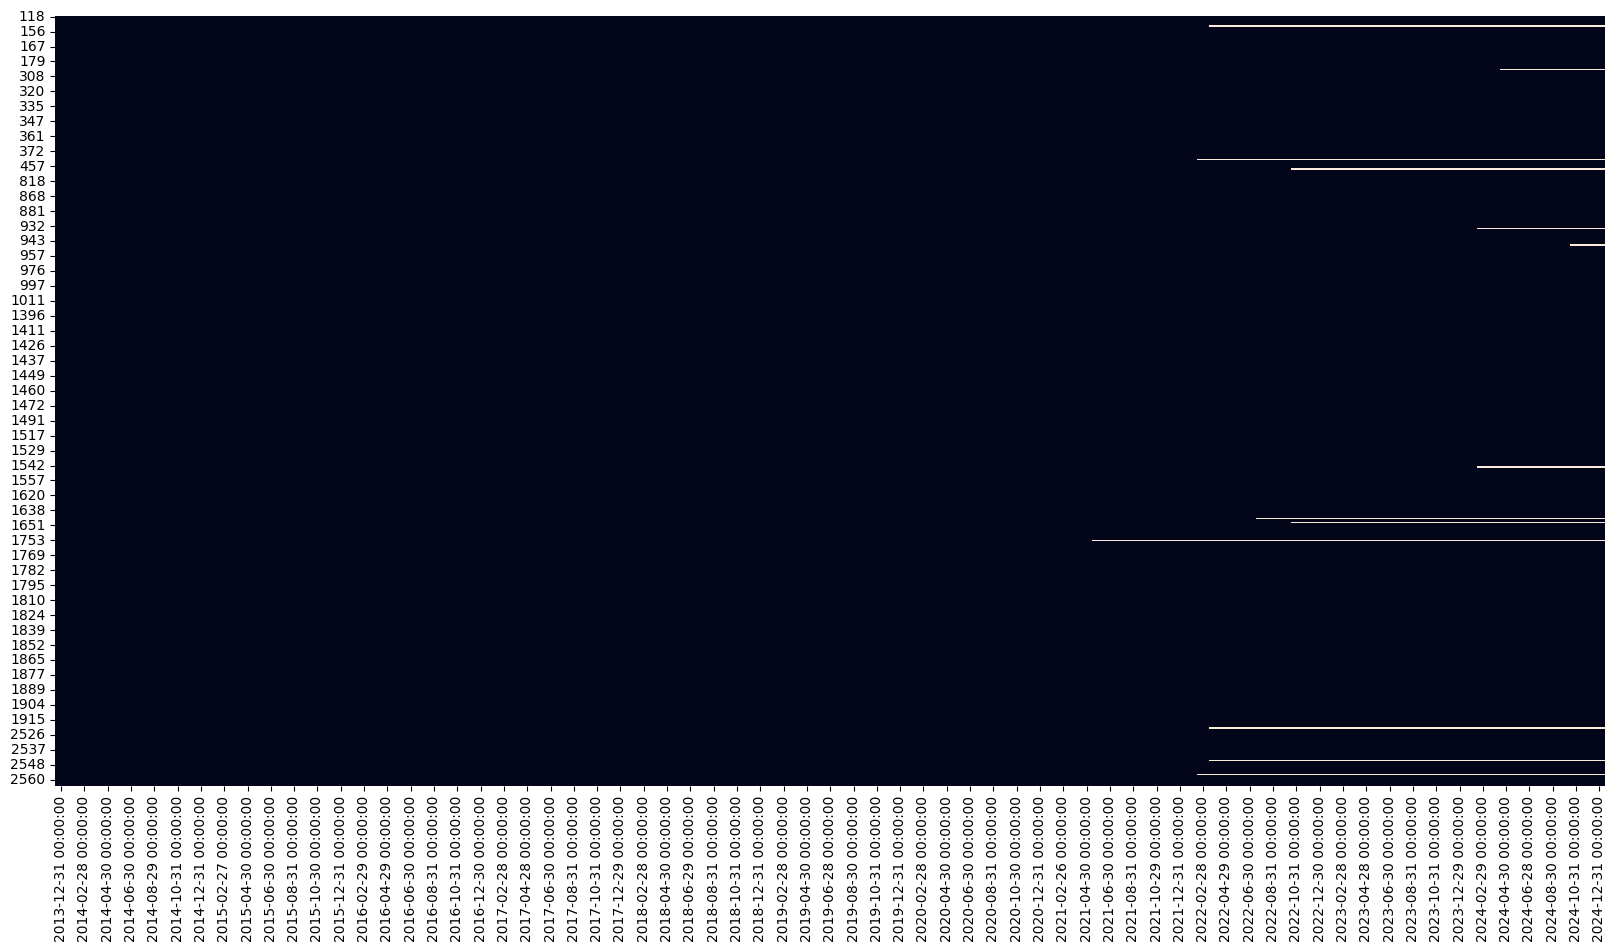

In [32]:
plt.figure(figsize=(20, 10))
sns.heatmap(EM_merged_DS_RI_USD_M_2014_2024.isnull(), cbar=False)
plt.show()

In [33]:
EM_merged_DS_RI_USD_M_2014_2024 = EM_merged_DS_RI_USD_M_2014_2024.fillna(0)

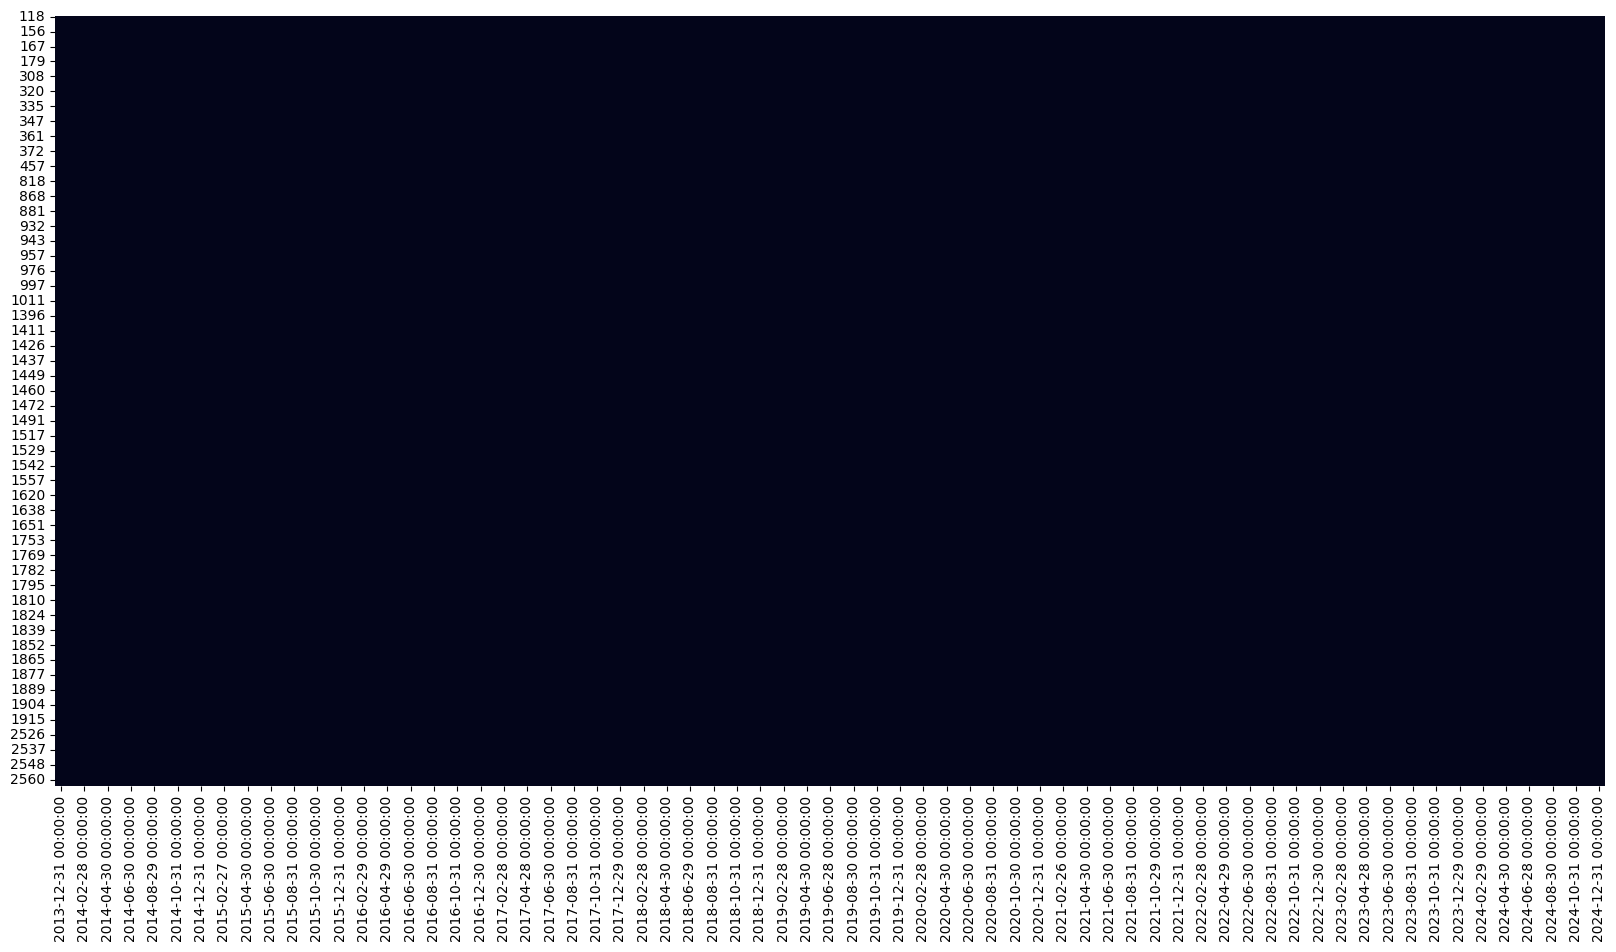

In [34]:
plt.figure(figsize=(20, 10))
sns.heatmap(EM_merged_DS_RI_USD_M_2014_2024.isnull(), cbar=False)
plt.show()

In [35]:
EM_merged_DS_RI_USD_M_2014_2024.isnull().sum().sum()

0

In [36]:
df = EM_merged_DS_RI_USD_M_2014_2024.copy() # duplicate RI df

simple_returns_M = df.pct_change(axis=1, fill_method=None) # calucate the percentage increase (simple returns) from year to year (ignoring the NAME and ISIN column)

simple_returns_M.replace([np.inf], 0, inplace=True) # to deal with infinite growth (o to some stock value), these jumps replaced by NaN, not sure about this!!!

simple_returns_M.fillna(0, inplace=True)

simple_returns_M.replace([-np.inf], -1, inplace=True)

simple_returns_M_2014_2024 = simple_returns_M.iloc[:, 1:]

simple_returns_M_2014_2024

2014-01-31  2014-02-28  2014-03-31  2014-04-30  2014-05-30  2014-06-30  \
118    -0.083601    0.028655   -0.148380   -0.066756   -0.056509   -0.019712   
146    -0.081488    0.087626    0.039537   -0.021640   -0.030519    0.011256   
147    -0.165964    0.033939    0.158901    0.036656   -0.027553    0.124174   
148    -0.121563    0.085193    0.185800    0.077213   -0.060868    0.047383   
149    -0.137319    0.029053    0.092648    0.125540   -0.048807    0.127229   
...          ...         ...         ...         ...         ...         ...   
2560   -0.081956    0.074204    0.039506   -0.005325    0.117630   -0.005184   
2561   -0.078198    0.060456    0.183882    0.032279   -0.004325    0.042585   
2562   -0.069950    0.053963   -0.058240    0.051648    0.031664    0.064829   
2563   -0.171951   -0.011345    0.042418   -0.003932    0.040853   -0.025787   
2564   -0.186802    0.108993   -0.007687    0.089040   -0.070715    0.012209   

      2014-07-31  2014-08-29  2014-09-30  2014-10-31  ...  2024-03-29  \
118     0.078113    0.016499   -0.094566   -0.030398  ...   -0.045455   
146    -0.023384    0.053382   -0.101144    0.035225  ...   -0.014473   
147     0.085073    0.281583   -0.332351    0.094324  ...   -0.021737   
148     0.053240    0.197649   -0.219025    0.072200  ...    0.030787   
149     0.018894    0.092953   -0.111890    0.105586  ...    0.072827   
...          ...         ...         ...         ...  ...         ...   
2560   -0.012862   -0.008018   -0.098141   -0.148107  ...    0.082942   
2561    0.029630    0.002107   -0.108775    0.155667  ...   -0.082512   
2562   -0.039706   -0.022358   -0.188283   -0.056349  ...    0.052891   
2563    0.042429   -0.053211   -0.084204   -0.067614  ...   -0.166667   
2564    0.100960    0.053300   -0.092207    0.118214  ...   -0.010616   

      2024-04-30  2024-05-31  2024-06-28  2024-07-31  2024-08-30  2024-09-30  \
118    -0.063492    0.000000   -0.050847   -0.089286    0.156863    0.050847   
146    -0.060544   -0.061723   -0.066038   -0.002754    0.108466    0.057737   
147    -0.064611   -0.024629   -0.044654   -0.023276    0.075064    0.011822   
148    -0.050563   -0.106172   -0.069301   -0.004353    0.265222   -0.015599   
149    -0.001119    0.085479    0.154542   -0.087171    0.243162   -0.062344   
...          ...         ...         ...         ...         ...         ...   
2560    0.040944    0.127626    0.080433    0.316925    0.012633    0.048533   
2561    0.036311    0.025936    0.095224    0.012335    0.127532    0.070606   
2562    0.113964    0.037187    0.011843    0.124900   -0.242873    0.072477   
2563    0.000000    0.000000    0.200000    0.333333    0.125000    0.000000   
2564    0.113734    0.011561    0.619048    0.311765    0.130045    0.122222   

      2024-10-31  2024-11-29  2024-12-31  
118     0.290323   -0.162500   -0.059701  
146    -0.090892   -0.023564   -0.060048  
147    -0.088666   -0.070730   -0.050255  
148    -0.072711   -0.140684   -0.108998  
149     0.043383   -0.061078   -0.007831  
...          ...         ...         ...  
2560    0.034932    0.097795    0.007029  
2561   -0.063144    0.001226    0.053002  
2562    0.164121   -0.154704   -0.170888  
2563   -0.111111    0.250000    0.000000  
2564   -0.005658   -0.066145   -0.086824  

[566 rows x 132 columns]

In [37]:
indices_cut_returns = simple_returns_M_2014_2024.index.tolist()

In [38]:
simple_returns_M_2014_2024.isnull().sum().sum()

0

In [39]:
simple_returns_M_2014_2024_prev = simple_returns_M.copy()

simple_returns_M_2014_2024_prev.columns = list(simple_returns_M_2014_2024_prev.columns[:4]) + list(pd.to_datetime(simple_returns_M_2014_2024_prev.columns[4:]))

start_date = pd.to_datetime('2013-12-31 00:00:00')
end_date = pd.to_datetime('2024-11-29 00:00:00')

simple_returns_M_2014_2024_prev = simple_returns_M_2014_2024_prev.loc[:, start_date:end_date]

simple_returns_M_2014_2024_prev = simple_returns_M_2014_2024_prev.apply(lambda row: row.fillna(row.mean()), axis=1) # fill nan with mean

simple_returns_M_2014_2024_prev

2013-12-31  2014-01-31  2014-02-28  2014-03-31  2014-04-30  2014-05-30  \
118          0.0   -0.083601    0.028655   -0.148380   -0.066756   -0.056509   
146          0.0   -0.081488    0.087626    0.039537   -0.021640   -0.030519   
147          0.0   -0.165964    0.033939    0.158901    0.036656   -0.027553   
148          0.0   -0.121563    0.085193    0.185800    0.077213   -0.060868   
149          0.0   -0.137319    0.029053    0.092648    0.125540   -0.048807   
...          ...         ...         ...         ...         ...         ...   
2560         0.0   -0.081956    0.074204    0.039506   -0.005325    0.117630   
2561         0.0   -0.078198    0.060456    0.183882    0.032279   -0.004325   
2562         0.0   -0.069950    0.053963   -0.058240    0.051648    0.031664   
2563         0.0   -0.171951   -0.011345    0.042418   -0.003932    0.040853   
2564         0.0   -0.186802    0.108993   -0.007687    0.089040   -0.070715   

      2014-06-30  2014-07-31  2014-08-29  2014-09-30  ...  2024-02-29  \
118    -0.019712    0.078113    0.016499   -0.094566  ...   -0.014925   
146     0.011256   -0.023384    0.053382   -0.101144  ...   -0.043564   
147     0.124174    0.085073    0.281583   -0.332351  ...    0.034190   
148     0.047383    0.053240    0.197649   -0.219025  ...   -0.108033   
149     0.127229    0.018894    0.092953   -0.111890  ...    0.076436   
...          ...         ...         ...         ...  ...         ...   
2560   -0.005184   -0.012862   -0.008018   -0.098141  ...    0.002615   
2561    0.042585    0.029630    0.002107   -0.108775  ...   -0.031918   
2562    0.064829   -0.039706   -0.022358   -0.188283  ...   -0.156905   
2563   -0.025787    0.042429   -0.053211   -0.084204  ...    0.000000   
2564    0.012209    0.100960    0.053300   -0.092207  ...   -0.145191   

      2024-03-29  2024-04-30  2024-05-31  2024-06-28  2024-07-31  2024-08-30  \
118    -0.045455   -0.063492    0.000000   -0.050847   -0.089286    0.156863   
146    -0.014473   -0.060544   -0.061723   -0.066038   -0.002754    0.108466   
147    -0.021737   -0.064611   -0.024629   -0.044654   -0.023276    0.075064   
148     0.030787   -0.050563   -0.106172   -0.069301   -0.004353    0.265222   
149     0.072827   -0.001119    0.085479    0.154542   -0.087171    0.243162   
...          ...         ...         ...         ...         ...         ...   
2560    0.082942    0.040944    0.127626    0.080433    0.316925    0.012633   
2561   -0.082512    0.036311    0.025936    0.095224    0.012335    0.127532   
2562    0.052891    0.113964    0.037187    0.011843    0.124900   -0.242873   
2563   -0.166667    0.000000    0.000000    0.200000    0.333333    0.125000   
2564   -0.010616    0.113734    0.011561    0.619048    0.311765    0.130045   

      2024-09-30  2024-10-31  2024-11-29  
118     0.050847    0.290323   -0.162500  
146     0.057737   -0.090892   -0.023564  
147     0.011822   -0.088666   -0.070730  
148    -0.015599   -0.072711   -0.140684  
149    -0.062344    0.043383   -0.061078  
...          ...         ...         ...  
2560    0.048533    0.034932    0.097795  
2561    0.070606   -0.063144    0.001226  
2562    0.072477    0.164121   -0.154704  
2563    0.000000   -0.111111    0.250000  
2564    0.122222   -0.005658   -0.066145  

[566 rows x 132 columns]

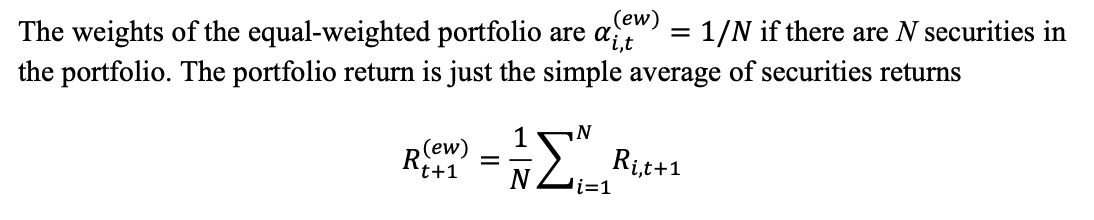

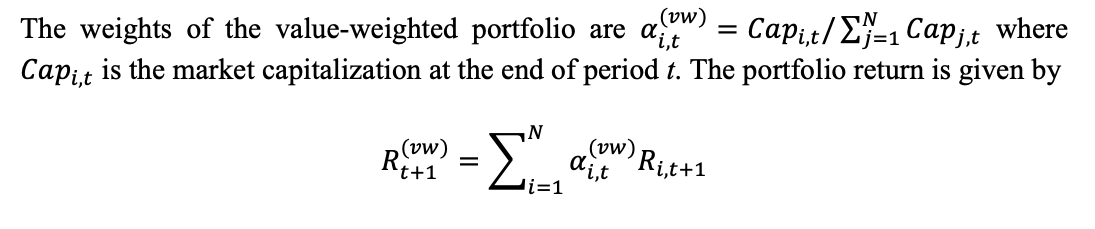

### Market Cap

In [40]:
Static_filtered = Static[['ISIN', 'Region']]

merged_DS_MV_USD_M = pd.merge(DS_MV_USD_M, Static_filtered, on='ISIN', how='inner')

# Move 'Desired_Column' to position 2 (index-based, 0 is first column)
col_to_move = 'Region'
new_position = 2  # Adjust the index to where you want it

# Remove the column and re-insert it at the new position
col = merged_DS_MV_USD_M.pop(col_to_move)
merged_DS_MV_USD_M.insert(new_position, col_to_move, col)


# Filter on EM countries
EM_merged_DS_MV_USD_M = merged_DS_MV_USD_M[merged_DS_MV_USD_M['Region'] == region]

EM_merged_DS_MV_USD_M

NAME          ISIN Region  \
1                                  ALUAR  ARALUA010258     EM   
2                   BANCO BBVA ARGENTINA  ARP125991090     EM   
3     TERNIUM ARGENTINA SOCIEDAD ANONIMA  ARSIDE010029     EM   
118               CHINA YURUN FOOD GROUP  BMG211591018     EM   
146                             AMBEV ON  BRABEVACNOR1     EM   
...                                  ...           ...    ...   
2560                    ALTRON LIMITED A  ZAE000191342     EM   
2561                          ABSA GROUP  ZAE000255915     EM   
2562              NORTHAM PLATINUM HLDGS  ZAE000298253     EM   
2563                               AVENG  ZAE000302618     EM   
2564                              NAMPAK  ZAE000322095     EM   

     1999-12-31 00:00:00  2000-01-31 00:00:00  2000-02-29 00:00:00  \
1                1129.31              1328.64              1395.07   
2                 1656.3              1570.39              1851.34   
3                1414.37              1407.47              1463.08   
118                  NaN                  NaN                  NaN   
146               898.33               848.69               810.12   
...                  ...                  ...                  ...   
2560              105.41               115.91               106.13   
2561             2882.25              2649.35              2483.04   
2562              230.57               259.71               207.52   
2563              436.66               445.83               454.09   
2564             1525.02              1350.98              1319.65   

      2000-03-31 00:00:00  2000-04-28 00:00:00  2000-05-31 00:00:00  \
1                 1362.23              1340.19              1317.78   
2                 1656.82              1388.70              1352.22   
3                 1460.01              1356.04               893.05   
118                   NaN                  NaN                  NaN   
146               1064.46              1062.92              1017.51   
...                   ...                  ...                  ...   
2560               113.98                90.17                76.58   
2561              2348.10              2295.91              2374.43   
2562               249.66               193.50               206.19   
2563               389.04               351.95               276.11   
2564              1182.07              1186.24               950.11   

      2000-06-30 00:00:00  ...  2024-04-30 00:00:00  2024-05-31 00:00:00  \
1                 1209.89  ...              2698.60              3165.16   
2                 1541.05  ...              2435.11              3210.54   
3                  955.70  ...              4340.63              5146.56   
118                   NaN  ...                36.82                36.81   
146               1287.05  ...             36938.22             34658.22   
...                   ...  ...                  ...                  ...   
2560                74.37  ...               248.89               280.70   
2561              2458.35  ...              6906.91              7086.12   
2562               264.77  ...              2632.31              2730.05   
2563               312.53  ...                42.32                39.84   
2564              1099.92  ...                80.95                81.84   

      2024-06-28 00:00:00  2024-07-31 00:00:00  2024-08-30 00:00:00  \
1                 3033.34              2875.18              2694.70   
2                 2818.34              2409.49              2832.34   
3                 4829.15              4589.92              3971.89   
118                 35.25                32.20                37.15   
146              32369.65             32280.60             35781.82   
...                   ...                  ...                  ...   
2560               295.36               388.98               393.90   
2561              7760.90              7856.60              8858.64   
2562     

In [41]:
EM_merged_DS_MV_USD_M = EM_merged_DS_MV_USD_M.loc[indices_cut_returns]


In [42]:
DS_MV_USD_M = EM_merged_DS_MV_USD_M.copy()

DS_MV_USD_M.columns = list(DS_MV_USD_M.columns[:3]) + list(pd.to_datetime(DS_MV_USD_M.columns[3:]))

start_date = pd.to_datetime('2013-12-31 00:00:00')
end_date = pd.to_datetime('2024-11-29 00:00:00')

DS_MV_USD_M_2014_2024 = DS_MV_USD_M.loc[:, start_date:end_date]

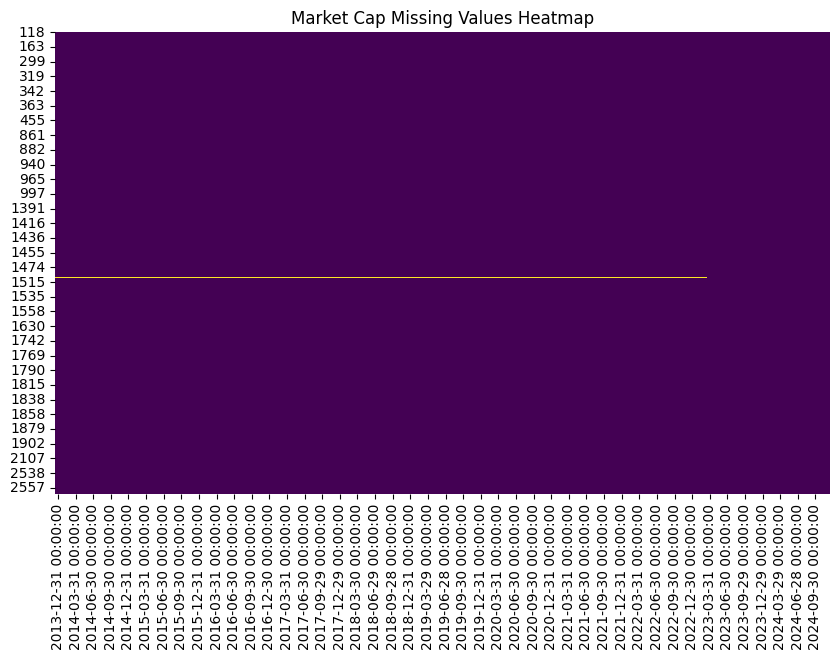

In [43]:
plt.figure(figsize=(10, 6))
sns.heatmap(DS_MV_USD_M_2014_2024.isna(), cmap='viridis', cbar=False)
plt.title("Market Cap Missing Values Heatmap")
plt.show()

In [44]:
DS_MV_USD_M_2014_2024 = DS_MV_USD_M_2014_2024.apply(lambda row: row.fillna(row.mean()), axis=1)

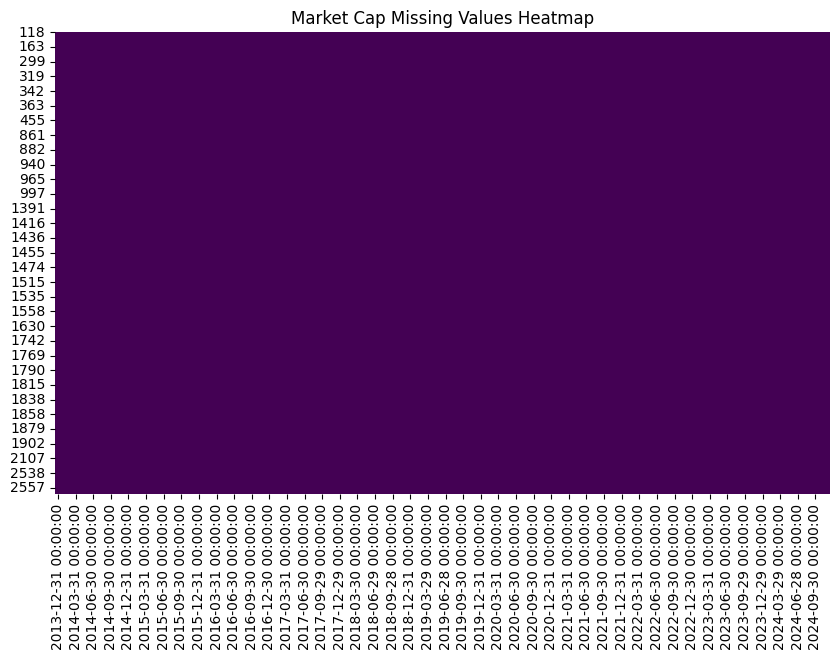

In [45]:
plt.figure(figsize=(10, 6))
sns.heatmap(DS_MV_USD_M_2014_2024.isna(), cmap='viridis', cbar=False)
plt.title("Market Cap Missing Values Heatmap")
plt.show()

In [46]:
rows_with_nans = DS_MV_USD_M_2014_2024[DS_MV_USD_M_2014_2024.isna().any(axis=1)]
rows_with_nans

Empty DataFrame
Columns: [2013-12-31 00:00:00, 2014-01-31 00:00:00, 2014-02-28 00:00:00, 2014-03-31 00:00:00, 2014-04-30 00:00:00, 2014-05-30 00:00:00, 2014-06-30 00:00:00, 2014-07-31 00:00:00, 2014-08-29 00:00:00, 2014-09-30 00:00:00, 2014-10-31 00:00:00, 2014-11-28 00:00:00, 2014-12-31 00:00:00, 2015-01-30 00:00:00, 2015-02-27 00:00:00, 2015-03-31 00:00:00, 2015-04-30 00:00:00, 2015-05-29 00:00:00, 2015-06-30 00:00:00, 2015-07-31 00:00:00, 2015-08-31 00:00:00, 2015-09-30 00:00:00, 2015-10-30 00:00:00, 2015-11-30 00:00:00, 2015-12-31 00:00:00, 2016-01-29 00:00:00, 2016-02-29 00:00:00, 2016-03-31 00:00:00, 2016-04-29 00:00:00, 2016-05-31 00:00:00, 2016-06-30 00:00:00, 2016-07-29 00:00:00, 2016-08-31 00:00:00, 2016-09-30 00:00:00, 2016-10-31 00:00:00, 2016-11-30 00:00:00, 2016-12-30 00:00:00, 2017-01-31 00:00:00, 2017-02-28 00:00:00, 2017-03-31 00:00:00, 2017-04-28 00:00:00, 2017-05-31 00:00:00, 2017-06-30 00:00:00, 2017-07-31 00:00:00, 2017-08-31 00:00:00, 2017-09-29 00:00:00, 2017-10-31 00:00:00, 2017-11-30 00:00:00, 2017-12-29 00:00:00, 2018-01-31 00:00:00, 2018-02-28 00:00:00, 2018-03-30 00:00:00, 2018-04-30 00:00:00, 2018-05-31 00:00:00, 2018-06-29 00:00:00, 2018-07-31 00:00:00, 2018-08-31 00:00:00, 2018-09-28 00:00:00, 2018-10-31 00:00:00, 2018-11-30 00:00:00, 2018-12-31 00:00:00, 2019-01-31 00:00:00, 2019-02-28 00:00:00, 2019-03-29 00:00:00, 2019-04-30 00:00:00, 2019-05-31 00:00:00, 2019-06-28 00:00:00, 2019-07-31 00:00:00, 2019-08-30 00:00:00, 2019-09-30 00:00:00, 2019-10-31 00:00:00, 2019-11-29 00:00:00, 2019-12-31 00:00:00, 2020-01-31 00:00:00, 2020-02-28 00:00:00, 2020-03-31 00:00:00, 2020-04-30 00:00:00, 2020-05-29 00:00:00, 2020-06-30 00:00:00, 2020-07-31 00:00:00, 2020-08-31 00:00:00, 2020-09-30 00:00:00, 2020-10-30 00:00:00, 2020-11-30 00:00:00, 2020-12-31 00:00:00, 2021-01-29 00:00:00, 2021-02-26 00:00:00, 2021-03-31 00:00:00, 2021-04-30 00:00:00, 2021-05-31 00:00:00, 2021-06-30 00:00:00, 2021-07-30 00:00:00, 2021-08-31 00:00:00, 2021-09-30 00:00:00, 2021-10-29 00:00:00, 2021-11-30 00:00:00, 2021-12-31 00:00:00, 2022-01-31 00:00:00, 2022-02-28 00:00:00, 2022-03-31 00:00:00, ...]
Index: []

[0 rows x 132 columns]

In [47]:
if DS_MV_USD_M_2014_2024.index.isin(rows_with_nans.index).any():
    DS_MV_USD_M_2014_2024 = DS_MV_USD_M_2014_2024.drop(rows_with_nans.index)

In [48]:
DS_MV_USD_M_2014_2024

2013-12-31  2014-01-31  2014-02-28  2014-03-31  2014-04-30  2014-05-30  \
118      1170.70     1072.79     1103.84      939.92      876.95      827.57   
146    114996.59   104071.17   113190.46   117679.20   114417.33   110958.88   
147     29634.93    24716.57    25391.21    28952.72    30013.98    29087.67   
148     25938.29    22723.27    24593.36    29077.23    31240.11    29269.99   
149     18213.15    15577.58    16030.14    17515.29    19714.15    18752.00   
...          ...         ...         ...         ...         ...         ...   
2560      239.61      219.97      236.29      245.64      244.33      273.06   
2561    10704.38     9867.48    10464.15    12009.48    12396.91    12343.29   
2562     1534.18     1482.66     1562.70     1471.59     1547.89     1596.54   
2563      984.11      815.02      805.68      839.87      836.60      870.75   
2564     2732.60     2175.39     2412.74     2394.78     2608.00     2423.58   

      2014-06-30  2014-07-31  2014-08-29  2014-09-30  ...  2024-02-29  \
118       811.38      874.92      889.02      805.15  ...       41.21   
146    112207.74   108525.20   114330.89   102799.57  ...    39886.69   
147     32305.75    35054.33    44808.42    29594.35  ...    33367.76   
148     30588.96    32131.64    38395.87    29919.18  ...    14699.78   
149     21137.78    21370.09    23356.46    20743.13  ...     5113.12   
...          ...         ...         ...         ...  ...         ...   
2560      263.71      260.31      258.23      232.88  ...      220.68   
2561    12869.13    13250.40    13278.13    11564.96  ...     7625.44   
2562     1700.40     1632.78     1596.26     1295.70  ...     2265.43   
2563      906.68      945.20      894.82      819.46  ...       45.79   
2564     2422.95     2667.66     2809.96     2550.85  ...       73.34   

      2024-03-29  2024-04-30  2024-05-31  2024-06-28  2024-07-31  2024-08-30  \
118        39.83       36.82       36.81       35.25       32.20       37.15   
146     39309.19    36938.22    34658.22    32369.65    32280.60    35781.82   
147     32411.79    30317.50    29570.88    27558.30    26916.82    28455.29   
148     15132.55    14347.73    12805.03    11839.36    11680.45    14669.45   
149      5485.47     5479.35     5947.72     6866.89     6268.28     7792.49   
...          ...         ...         ...         ...         ...         ...   
2560      239.09      248.89      280.70      295.36      388.98      393.90   
2561     6996.32     6906.91     7086.12     7760.90     7856.60     8858.64   
2562     2363.04     2632.31     2730.05     2762.38     3107.39     2352.88   
2563       39.68       42.32       39.84       48.32       61.15       71.10   
2564       72.60       80.95       81.84      132.52      173.79      196.43   

      2024-09-30  2024-10-31  2024-11-29  
118        39.19       50.41       42.16  
146     37847.65    34407.58    33596.80  
147     28602.67    26066.58    23775.07  
148     14338.50    13186.18    11236.44  
149      7306.66     7623.63     6991.22  
...          ...         ...         ...  
2560      413.00      427.45      460.04  
2561     9105.44     8530.48     8540.85  
2562     2507.23     2918.45     2467.31  
2563       70.09       66.52       78.76  
2564      220.35      219.24      204.73  

[566 rows x 132 columns]

In [49]:
if simple_returns_M_2014_2024.index.isin(rows_with_nans.index).any():
    simple_returns_M_2014_2024 = simple_returns_M_2014_2024.drop(rows_with_nans.index, errors='ignore')

if simple_returns_M_2014_2024_prev.index.isin(rows_with_nans.index).any():
    simple_returns_M_2014_2024_prev = simple_returns_M_2014_2024_prev.drop(rows_with_nans.index, errors='ignore')

if simple_returns_M_2014_2024_prev.index.isin(rows_with_nans_returns.index).any():
    simple_returns_M_2014_2024_prev = simple_returns_M_2014_2024_prev.drop(rows_with_nans_returns.index, errors='ignore')

### Equal-weights portfolio

In [50]:
num_assets_per_month = simple_returns_M_2014_2024_prev.count(axis=0) # count total number of companies (N) in the previous month

equal_weights_df = pd.DataFrame([1/num_assets_per_month] * simple_returns_M_2014_2024.shape[0]) # create df that has weighting multiplier for the whole df, varying over months

DS_MV_USD_M_2014_2024_modified = DS_MV_USD_M_2014_2024.fillna(0).replace(np.nan, 0).applymap(lambda x: 1 if x != 0 else 0)

#equal_weights_df = equal_weights_df*DS_MV_USD_M_2014_2024_modified

equal_weights_df.columns = simple_returns_M_2014_2024.columns # adjust indices

simple_returns_M_2014_2024.reset_index(drop=True, inplace=True)

equal_weighted_returns_df = simple_returns_M_2014_2024 * equal_weights_df # matrix with the whole equal weighted returns

ew_portfolio_returns = equal_weighted_returns_df.sum(axis=0) # average monthly equal weighted return per month

ew_portfolio_returns = ew_portfolio_returns.reset_index()
ew_portfolio_returns.columns = ['date', 'ew_return']

ew_portfolio_returns

<ipython-input-50-91e597183446>:5: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  DS_MV_USD_M_2014_2024_modified = DS_MV_USD_M_2014_2024.fillna(0).replace(np.nan, 0).applymap(lambda x: 1 if x != 0 else 0)


date  ew_return
0   2014-01-31  -0.051519
1   2014-02-28   0.030091
2   2014-03-31   0.044182
3   2014-04-30   0.012837
4   2014-05-30   0.036524
..         ...        ...
127 2024-08-30   0.022013
128 2024-09-30   0.051766
129 2024-10-31  -0.054013
130 2024-11-29  -0.024306
131 2024-12-31  -0.025132

[132 rows x 2 columns]

In [51]:
equal_weighted_returns_df

2014-01-31  2014-02-28  2014-03-31  2014-04-30  2014-05-30  2014-06-30  \
0     -0.000148    0.000051   -0.000262   -0.000118   -0.000100   -0.000035   
1     -0.000144    0.000155    0.000070   -0.000038   -0.000054    0.000020   
2     -0.000293    0.000060    0.000281    0.000065   -0.000049    0.000219   
3     -0.000215    0.000151    0.000328    0.000136   -0.000108    0.000084   
4     -0.000243    0.000051    0.000164    0.000222   -0.000086    0.000225   
..          ...         ...         ...         ...         ...         ...   
561   -0.000145    0.000131    0.000070   -0.000009    0.000208   -0.000009   
562   -0.000138    0.000107    0.000325    0.000057   -0.000008    0.000075   
563   -0.000124    0.000095   -0.000103    0.000091    0.000056    0.000115   
564   -0.000304   -0.000020    0.000075   -0.000007    0.000072   -0.000046   
565   -0.000330    0.000193   -0.000014    0.000157   -0.000125    0.000022   

     2014-07-31  2014-08-29  2014-09-30  2014-10-31  ...  2024-03-29  \
0      0.000138    0.000029   -0.000167   -0.000054  ...   -0.000080   
1     -0.000041    0.000094   -0.000179    0.000062  ...   -0.000026   
2      0.000150    0.000497   -0.000587    0.000167  ...   -0.000038   
3      0.000094    0.000349   -0.000387    0.000128  ...    0.000054   
4      0.000033    0.000164   -0.000198    0.000187  ...    0.000129   
..          ...         ...         ...         ...  ...         ...   
561   -0.000023   -0.000014   -0.000173   -0.000262  ...    0.000147   
562    0.000052    0.000004   -0.000192    0.000275  ...   -0.000146   
563   -0.000070   -0.000040   -0.000333   -0.000100  ...    0.000093   
564    0.000075   -0.000094   -0.000149   -0.000119  ...   -0.000294   
565    0.000178    0.000094   -0.000163    0.000209  ...   -0.000019   

     2024-04-30  2024-05-31  2024-06-28  2024-07-31  2024-08-30  2024-09-30  \
0     -0.000112    0.000000   -0.000090   -0.000158    0.000277    0.000090   
1     -0.000107   -0.000109   -0.000117   -0.000005    0.000192    0.000102   
2     -0.000114   -0.000044   -0.000079   -0.000041    0.000133    0.000021   
3     -0.000089   -0.000188   -0.000122   -0.000008    0.000469   -0.000028   
4     -0.000002    0.000151    0.000273   -0.000154    0.000430   -0.000110   
..          ...         ...         ...         ...         ...         ...   
561    0.000072    0.000225    0.000142    0.000560    0.000022    0.000086   
562    0.000064    0.000046    0.000168    0.000022    0.000225    0.000125   
563    0.000201    0.000066    0.000021    0.000221   -0.000429    0.000128   
564    0.000000    0.000000    0.000353    0.000589    0.000221    0.000000   
565    0.000201    0.000020    0.001094    0.000551    0.000230    0.000216   

     2024-10-31  2024-11-29  2024-12-31  
0      0.000513   -0.000287   -0.000105  
1     -0.000161   -0.000042   -0.000106  
2     -0.000157   -0.000125   -0.000089  
3     -0.000128   -0.000249   -0.000193  
4      0.000077   -0.000108   -0.000014  
..          ...         ...         ...  
561    0.000062    0.000173    0.000012  
562   -0.000112    0.000002    0.000094  
563    0.000290   -0.000273   -0.000302  
564   -0.000196    0.000442    0.000000  
565   -0.000010   -0.000117   -0.000153  

[566 rows x 132 columns]

### Value-weighted portfolio

In [52]:
total_market_cap_per_month = DS_MV_USD_M_2014_2024.sum(axis=0) # total market cap of previous month (determined by data selection in data frame preparation)

market_cap_divider_df = pd.DataFrame([1/total_market_cap_per_month] * simple_returns_M_2014_2024.shape[0]) # matrix with 1/montly market cap to divide

market_cap_divider_df.reset_index(drop=True, inplace=True)

DS_MV_USD_M_2014_2024.reset_index(drop=True, inplace=True)

value_weights_df = DS_MV_USD_M_2014_2024 * market_cap_divider_df # matrix with monthly weighted assets

simple_returns_M_2014_2024.reset_index(drop=True, inplace=True)

value_weights_df.columns = simple_returns_M_2014_2024.columns # adjusting indices

value_weighted_returns_df = simple_returns_M_2014_2024 * value_weights_df # matrix with the whole value weighted returns

vw_portfolio_returns = value_weighted_returns_df.sum(axis=0) # average monthly value weighted return

vw_portfolio_returns = vw_portfolio_returns.reset_index()
vw_portfolio_returns.columns = ['date', 'vw_return']

vw_portfolio_returns

date  vw_return
0   2014-01-31  -0.060380
1   2014-02-28   0.031644
2   2014-03-31   0.036572
3   2014-04-30   0.013129
4   2014-05-30   0.039535
..         ...        ...
127 2024-08-30   0.018401
128 2024-09-30   0.031769
129 2024-10-31  -0.043782
130 2024-11-29  -0.029044
131 2024-12-31  -0.005002

[132 rows x 2 columns]

In [53]:
market_cap_divider_df

2013-12-31    2014-01-31    2014-02-28    2014-03-31    2014-04-30  \
0    1.897564e-07  2.017155e-07  1.951138e-07  1.886262e-07  1.873543e-07   
1    1.897564e-07  2.017155e-07  1.951138e-07  1.886262e-07  1.873543e-07   
2    1.897564e-07  2.017155e-07  1.951138e-07  1.886262e-07  1.873543e-07   
3    1.897564e-07  2.017155e-07  1.951138e-07  1.886262e-07  1.873543e-07   
4    1.897564e-07  2.017155e-07  1.951138e-07  1.886262e-07  1.873543e-07   
..            ...           ...           ...           ...           ...   
561  1.897564e-07  2.017155e-07  1.951138e-07  1.886262e-07  1.873543e-07   
562  1.897564e-07  2.017155e-07  1.951138e-07  1.886262e-07  1.873543e-07   
563  1.897564e-07  2.017155e-07  1.951138e-07  1.886262e-07  1.873543e-07   
564  1.897564e-07  2.017155e-07  1.951138e-07  1.886262e-07  1.873543e-07   
565  1.897564e-07  2.017155e-07  1.951138e-07  1.886262e-07  1.873543e-07   

       2014-05-30    2014-06-30    2014-07-31    2014-08-29    2014-09-30  \
0    1.801876e-07  1.761556e-07  1.725584e-07  1.676650e-07  1.793393e-07   
1    1.801876e-07  1.761556e-07  1.725584e-07  1.676650e-07  1.793393e-07   
2    1.801876e-07  1.761556e-07  1.725584e-07  1.676650e-07  1.793393e-07   
3    1.801876e-07  1.761556e-07  1.725584e-07  1.676650e-07  1.793393e-07   
4    1.801876e-07  1.761556e-07  1.725584e-07  1.676650e-07  1.793393e-07   
..            ...           ...           ...           ...           ...   
561  1.801876e-07  1.761556e-07  1.725584e-07  1.676650e-07  1.793393e-07   
562  1.801876e-07  1.761556e-07  1.725584e-07  1.676650e-07  1.793393e-07   
563  1.801876e-07  1.761556e-07  1.725584e-07  1.676650e-07  1.793393e-07   
564  1.801876e-07  1.761556e-07  1.725584e-07  1.676650e-07  1.793393e-07   
565  1.801876e-07  1.761556e-07  1.725584e-07  1.676650e-07  1.793393e-07   

     ...    2024-02-29    2024-03-29    2024-04-30    2024-05-31  \
0    ...  1.329339e-07  1.292959e-07  1.286088e-07  1.269161e-07   
1    ...  1.329339e-07  1.292959e-07  1.286088e-07  1.269161e-07   
2    ...  1.329339e-07  1.292959e-07  1.286088e-07  1.269161e-07   
3    ...  1.329339e-07  1.292959e-07  1.286088e-07  1.269161e-07   
4    ...  1.329339e-07  1.292959e-07  1.286088e-07  1.269161e-07   
..   ...           ...           ...           ...           ...   
561  ...  1.329339e-07  1.292959e-07  1.286088e-07  1.269161e-07   
562  ...  1.329339e-07  1.292959e-07  1.286088e-07  1.269161e-07   
563  ...  1.329339e-07  1.292959e-07  1.286088e-07  1.269161e-07   
564  ...  1.329339e-07  1.292959e-07  1.286088e-07  1.269161e-07   
565  ...  1.329339e-07  1.292959e-07  1.286088e-07  1.269161e-07   

       2024-06-28    2024-07-31    2024-08-30    2024-09-30    2024-10-31  \
0    1.213373e-07  1.220456e-07  1.199634e-07  1.166596e-07  1.220753e-07   
1    1.213373e-07  1.220456e-07  1.199634e-07  1.166596e-07  1.220753e-07   
2    1.213373e-07  1.220456e-07  1.199634e-07  1.166596e-07  1.220753e-07   
3    1.213373e-07  1.220456e-07  1.199634e-07  1.166596e-07  1.220753e-07   
4    1.213373e-07  1.220456e-07  1.199634e-07  1.166596e-07  1.220753e-07   
..            ...           ...           ...           ...           ...   
561  1.213373e-07  1.220456e-07  1.199634e-07  1.166596e-07  1.220753e-07   
562  1.213373e-07  1.220456e-07  1.199634e-07  1.166596e-07  1.220753e-07   
563  1.213373e-07  1.220456e-07  1.199634e-07  1.166596e-07  1.220753e-07   
564  1.213373e-07  1.220456e-07  1.199634e-07  1.166596e-07  1.220753e-07   
565  1.213373e-07  1.220456e-07  1.199634e-07  1.166596e-07  1.220753e-07   

       2024-11-29  
0    1.258446e-07  
1    1.258446e-07  
2    1.258446e-07  
3    1.258446e-07  
4    1.258446e-07  
..            ...  
561  1.258446e-07  
562  1.258446e-07  
563  1.258446e-07  
564  1.258446e-07  
565  1.258446e-07  

[566 rows x 132 columns]

### Comparison value- vs equal-weights portfolio

In [54]:
returns_df = pd.merge(ew_portfolio_returns, vw_portfolio_returns, on='date')

total_market_cap_df = total_market_cap_per_month.reset_index()
total_market_cap_df.columns = ['date', 'market_cap_total_prev_month']

returns_df = pd.merge(returns_df, total_market_cap_df, on='date', how='left')

# Number of assets based on market cap
num_assets_per_month_df = num_assets_per_month.reset_index()
num_assets_per_month_df.columns = ['date', 'num_assets_per_month']

returns_df = pd.merge(returns_df, num_assets_per_month_df, on='date', how='left')


# Number of assets based on return data
num_assets_per_month_return_data = DS_MV_USD_M_2014_2024.count(axis=0)

num_assets_per_month_return_data_df = num_assets_per_month_return_data.reset_index()
num_assets_per_month_return_data_df.columns = ['date', 'num_assets_per_month_return_data']

returns_df = pd.merge(returns_df, num_assets_per_month_return_data_df, on='date', how='left')

# Add risk free rate to df
returns_df['year_month'] = returns_df['date'].dt.to_period('M').astype(str)
risk_free_rate_df['year_month'] = risk_free_rate_df['date'].dt.to_period('M').astype(str)

returns_df = pd.merge(returns_df, risk_free_rate_df[['year_month', 'RF']], on='year_month', how='left')

# Adding squared difference to df
ew_return_average = returns_df['ew_return'].mean()
vw_return_average = returns_df['vw_return'].mean()

if 'ew_squared_difference_ew'not in returns_df.columns:
  returns_df['ew_squared_difference'] = ((returns_df['ew_return'] - ew_return_average) ** 2)
if 'vw_squared_difference_vw'not in returns_df.columns:
  returns_df['vw_squared_difference'] = ((returns_df['vw_return'] - vw_return_average) ** 2)

# Adding cumulative returns to df
if 'ew_cumulative_returns'not in returns_df.columns:
  returns_df['ew_cumulative_returns'] = ((1 + returns_df['ew_return']).cumprod() - 1)
if 'vw_cumulative_returns'not in returns_df.columns:
  returns_df['vw_cumulative_returns'] = ((1 + returns_df['vw_return']).cumprod() - 1)

if 'rf_cumulative_returns'not in returns_df.columns:
  returns_df['rf_cumulative_returns'] = ((1 + returns_df['RF']).cumprod() - 1)


returns_df

date  ew_return  vw_return  market_cap_total_prev_month  \
0   2014-01-31  -0.051519  -0.060380                 4.957478e+06   
1   2014-02-28   0.030091   0.031644                 5.125215e+06   
2   2014-03-31   0.044182   0.036572                 5.301491e+06   
3   2014-04-30   0.012837   0.013129                 5.337481e+06   
4   2014-05-30   0.036524   0.039535                 5.549771e+06   
..         ...        ...        ...                          ...   
127 2024-08-30   0.022013   0.018401                 8.335877e+06   
128 2024-09-30   0.051766   0.031769                 8.571947e+06   
129 2024-10-31  -0.054013  -0.043782                 8.191666e+06   
130 2024-11-29  -0.024306  -0.029044                 7.946311e+06   
131 2024-12-31  -0.025132  -0.005002                          NaN   

     num_assets_per_month  num_assets_per_month_return_data year_month  \
0                   566.0                             566.0    2014-01   
1                   566.0                             566.0    2014-02   
2                   566.0                             566.0    2014-03   
3                   566.0                             566.0    2014-04   
4                   566.0                             566.0    2014-05   
..                    ...                               ...        ...   
127                 566.0                             566.0    2024-08   
128                 566.0                             566.0    2024-09   
129                 566.0                             566.0    2024-10   
130                 566.0                             566.0    2024-11   
131                   NaN                               NaN    2024-12   

         RF  ew_squared_difference  vw_squared_difference  \
0    0.0000               0.003424               0.004447   
1    0.0000               0.000533               0.000642   
2    0.0000               0.001383               0.000916   
3    0.0000               0.000034               0.000047   
4    0.0000               0.000872               0.001104   
..      ...                    ...                    ...   
127  0.0048               0.000225               0.000146   
128  0.0040               0.002004               0.000648   
129  0.0039               0.003722               0.002509   
130  0.0040               0.000980               0.001250   
131  0.0037               0.001032               0.000128   

     ew_cumulative_returns  vw_cumulative_returns  rf_cumulative_returns  
0                -0.051519              -0.060380               0.000000  
1                -0.022978              -0.030647               0.000000  
2                 0.020189               0.004805               0.000000  
3                 0.033285               0.017997               0.000000  
4                 0.071025               0.058244               0.000000  
..                     ...                    ...                    ...  
127               1.232197               1.097681               0.164355  
128               1.347748               1.164322               0.169012  
129               1.220940               1.069562               0.173571  
130               1.166958               1.009455               0.178265  
131               1.112498               0.999404               0.182625  

[132 rows x 13 columns]

### Visualizations

In [55]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.heatmap(simple_returns_M_2014_2024.isna(), cmap='viridis', cbar=False)
plt.title("Returns Missing Values Heatmap")
plt.show()

In [56]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.heatmap(DS_MV_USD_M_2014_2024.isna(), cmap='viridis', cbar=False)
plt.title("Market Cap Missing Values Heatmap")
plt.show()

In [57]:
plt.figure(figsize=(12, 6))
plt.plot(returns_df.date, returns_df.RF)
plt.xlabel('Date')
plt.ylabel('Montly risk free rate')
plt.title('Risk Free Rate Over Time')
plt.grid(True)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout() # Adjust layout to prevent labels from overlapping
plt.show()

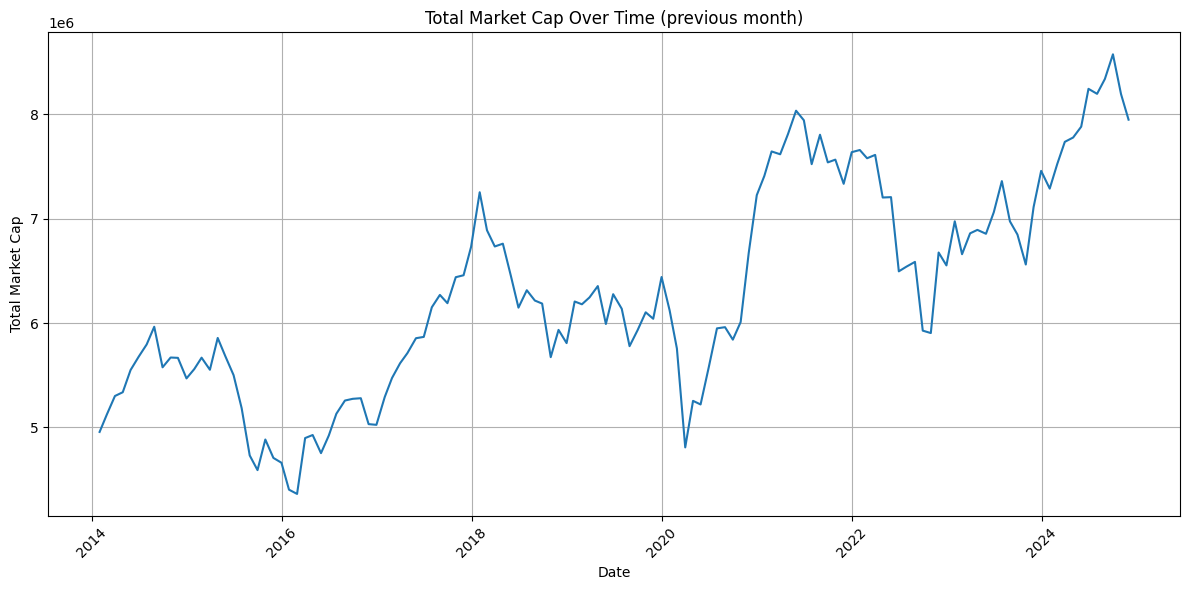

In [58]:
plt.figure(figsize=(12, 6))
plt.plot(returns_df.date, returns_df.market_cap_total_prev_month)
plt.xlabel('Date')
plt.ylabel('Total Market Cap')
plt.title('Total Market Cap Over Time (previous month)')
plt.grid(True)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout() # Adjust layout to prevent labels from overlapping
plt.show()

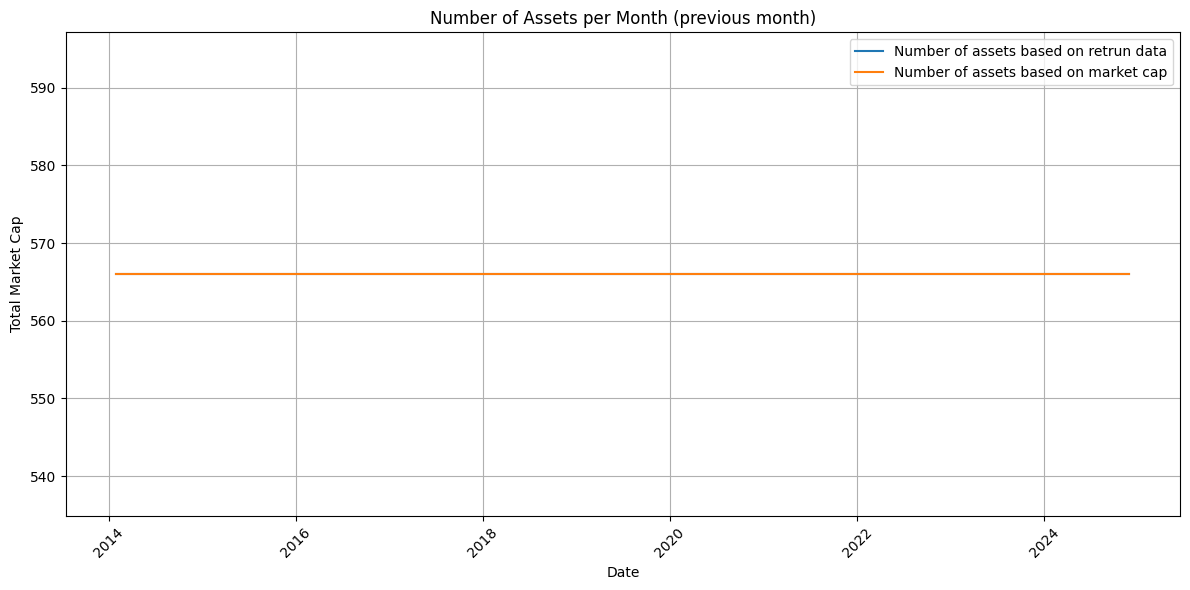

In [59]:
plt.figure(figsize=(12, 6))
plt.plot(returns_df.date, returns_df.num_assets_per_month, label = 'Number of assets based on retrun data')
plt.plot(returns_df.date, returns_df.num_assets_per_month_return_data, label = 'Number of assets based on market cap')
plt.xlabel('Date')
plt.ylabel('Total Market Cap')
plt.title('Number of Assets per Month (previous month)')
plt.grid(True)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout() # Adjust layout to prevent labels from overlapping
plt.legend()
plt.show()

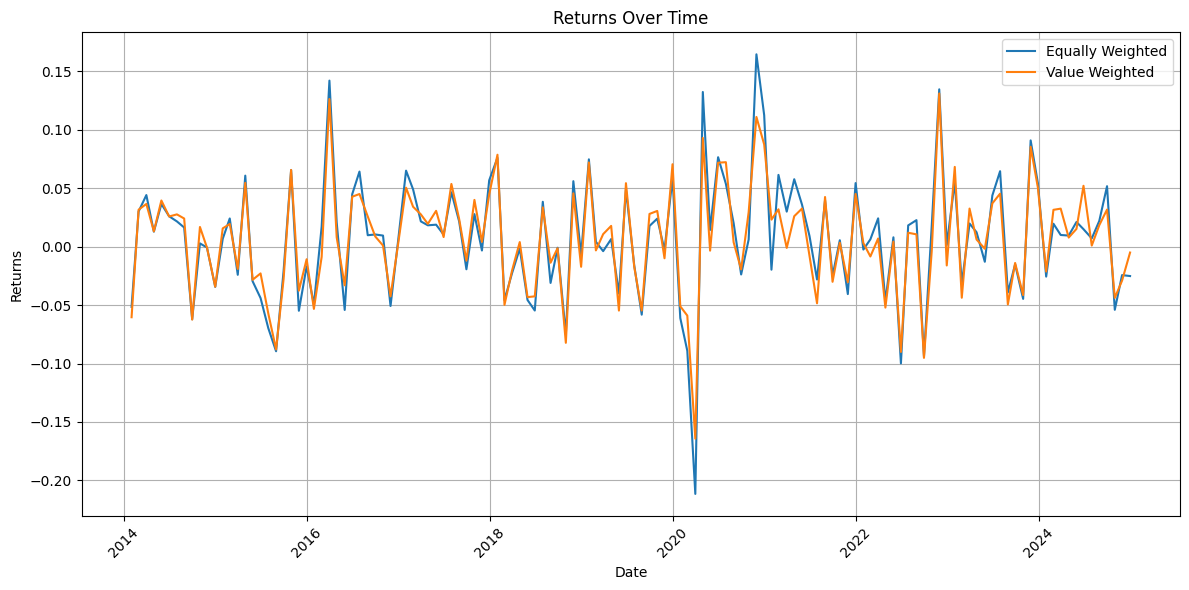

In [60]:
plt.figure(figsize=(12, 6))
plt.plot(returns_df.date, returns_df.ew_return, label='Equally Weighted')
plt.plot(returns_df.date, returns_df.vw_return, label='Value Weighted')
plt.xlabel('Date')
plt.ylabel('Returns')
plt.title('Returns Over Time')
plt.grid(True)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout() # Adjust layout to prevent labels from overlapping
plt.legend()  # Add the legend
plt.show()

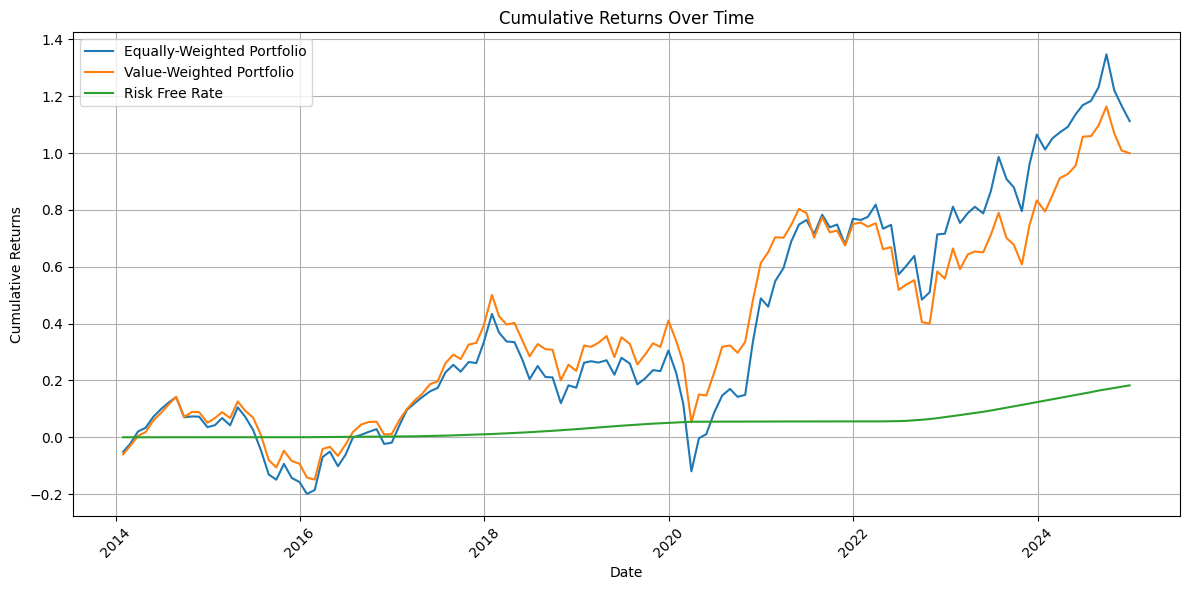

In [61]:
plt.figure(figsize=(12, 6))
plt.plot(returns_df.date, returns_df.ew_cumulative_returns, label='Equally-Weighted Portfolio')
plt.plot(returns_df.date, returns_df.vw_cumulative_returns, label='Value-Weighted Portfolio')
plt.plot(returns_df.date, returns_df.rf_cumulative_returns, label='Risk Free Rate')
plt.xlabel('Date')
plt.ylabel('Cumulative Returns')
plt.title('Cumulative Returns Over Time')
plt.grid(True)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout() # Adjust layout to prevent labels from overlapping
plt.legend()  # Add the legend
plt.show()

apparently normal behaviour, equally weighted portfolios usually have higher returns, but are more affected by a crisis

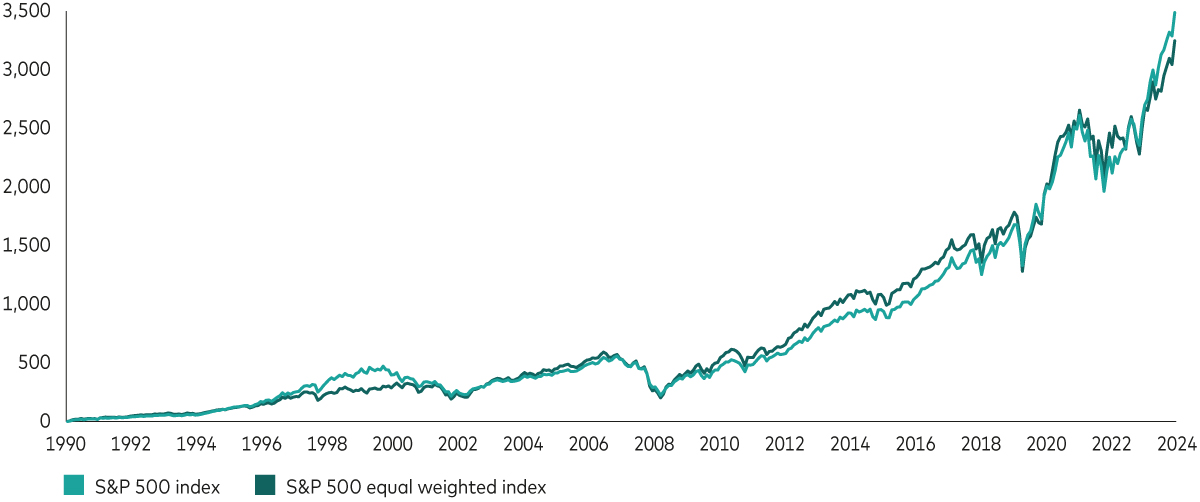

In [62]:
total_return = (1 + returns_df['ew_return']).prod() - 1  # Cumulative product of returns

# Step 2: Count total months in the dataset
N = len(returns_df)

# Step 3: Annualize the return
ew_annualized_return = (1 + total_return) ** (12 / N) - 1

print(f"Annualized return of the equally weighted portfolio: {ew_annualized_return:.6f}")

Annualized return of the equally weighted portfolio: 0.070353


In [63]:
total_return = (1 + returns_df['vw_return']).prod() - 1  # Cumulative product of returns

# Step 2: Count total months in the dataset
N = len(returns_df)

# Step 3: Annualize the return
vw_annualized_return = (1 + total_return) ** (12 / N) - 1

print(f"Annualized return of the value weighted portfolio: {vw_annualized_return:.6f}")

Annualized return of the value weighted portfolio: 0.065012


In [64]:
min_ew_return = returns_df['ew_return'].min()
print(f"Minimum retrun in the equally weighted portfolio: {min_ew_return}")

Minimum retrun in the equally weighted portfolio: -0.21160288536489377


In [65]:
min_vw_return = returns_df['vw_return'].min()
print(f"Minimum retrun in the value weighted portfolio: {min_vw_return}")

Minimum retrun in the value weighted portfolio: -0.16431603466928152


In [66]:
max_ew_return = returns_df['ew_return'].max()
print(f"Maximum retrun in the equally weighted portfolio: {max_ew_return}")

Maximum retrun in the equally weighted portfolio: 0.16464744581338658


In [67]:
max_vw_return = returns_df['vw_return'].max()
print(f"Maximum retrun in the value weighted portfolio: {max_vw_return}")

Maximum retrun in the value weighted portfolio: 0.13114685311295646


In [68]:
import numpy as np

# Compute sample variance (N-1 for unbiased estimator)
ew_variance = returns_df['ew_squared_difference'].sum() / (len(returns_df))

# Convert variance to standard deviation (monthly volatility)
ew_volatility = np.sqrt(ew_variance)

# Annualize volatility (since returns are monthly, use sqrt(12))
ew_volatility_annualized = ew_volatility * np.sqrt(12)

# Print results
print(f"Annualized volatility of the equally-weighted portfolio: {ew_volatility_annualized}")

Annualized volatility of the equally-weighted portfolio: 0.1772330952512773


In [69]:
import numpy as np

# Compute sample variance (N-1 for unbiased estimator)
vw_variance = returns_df['vw_squared_difference'].sum() / (len(returns_df))

# Convert variance to standard deviation (monthly volatility)
vw_volatility = np.sqrt(vw_variance)

# Annualize volatility (since returns are monthly, use sqrt(12))
vw_volatility_annualized = vw_volatility * np.sqrt(12)

# Print results
print(f"Annualized volatility of the value-weighted portfolio: {vw_volatility_annualized}")

Annualized volatility of the value-weighted portfolio: 0.1580432710109599


In [70]:
df = returns_df

df['ew_excess_return'] = df['ew_return'] - df['RF']

# Calculate Sharpe Ratio
mean_excess_return = df['ew_excess_return'].mean()
std_excess_return = df['ew_excess_return'].std()

ew_sharpe_ratio = mean_excess_return / std_excess_return

print(f"Sharpe Ratio: {ew_sharpe_ratio:.4f}")

Sharpe Ratio: 0.1114


In [71]:
ew_annualized_sharpe_ratio = ew_sharpe_ratio * np.sqrt(12)
print(f"Annualized Sharpe Ratio: {ew_annualized_sharpe_ratio:.4f}")

Annualized Sharpe Ratio: 0.3860


In [72]:
df = returns_df

df['vw_excess_return'] = df['vw_return'] - df['RF']

# Calculate Sharpe Ratio
mean_excess_return = df['vw_excess_return'].mean()
std_excess_return = df['vw_excess_return'].std()

vw_sharpe_ratio = mean_excess_return / std_excess_return

print(f"Sharpe Ratio: {vw_sharpe_ratio:.4f}")

Sharpe Ratio: 0.1099


In [73]:
vw_annualized_sharpe_ratio = vw_sharpe_ratio * np.sqrt(12)
print(f"Annualized Sharpe Ratio: {vw_annualized_sharpe_ratio:.4f}")

Annualized Sharpe Ratio: 0.3808


In [74]:
# prompt: create a df with the above values to compare the two portfolios

import pandas as pd

data = {
    'Portfolio': ['Equally Weighted', 'Value Weighted'],
    'Annualized Return': [ew_annualized_return, vw_annualized_return],  # Replace with actual values
    'Minimum Return': [min_ew_return, min_vw_return],
    'Maximum Return': [max_ew_return, max_vw_return],
    'Annualized Volatility': [ew_volatility_annualized, vw_volatility_annualized],
    'Annualized Sharpe Ratio': [ew_annualized_sharpe_ratio, vw_annualized_sharpe_ratio]
}

df = pd.DataFrame(data)
summary_df = df

summary_df


Portfolio  Annualized Return  Minimum Return  Maximum Return  \
0  Equally Weighted           0.070353       -0.211603        0.164647   
1    Value Weighted           0.065012       -0.164316        0.131147   

   Annualized Volatility  Annualized Sharpe Ratio  
0               0.177233                 0.385953  
1               0.158043                 0.380816

## Question 3: Efficient frontier (35 points)

In [75]:
import scipy.optimize as sco

In [76]:
simple_returns_M_2014_2024_T = simple_returns_M_2014_2024.T

In [77]:
returns_data = simple_returns_M_2014_2024_T
#num_assets = num_assets_per_month
cov_matrix = returns_data.cov()
num_assets = cov_matrix.shape[1]

In [78]:
def port_vol(weights) :
  return np.sqrt(np.dot(weights.T, np.dot(cov_matrix * 12, weights)))

def port_ret(weights) :
  return np.sum(returns_data.mean() * weights)*12

def port_ret_neg(weights) :
  return -np.sum(returns_data.mean() * weights)*12

In [79]:
cons = ({'type' : 'eq', 'fun' : lambda x : np.sum(x) - 1})

# Bounds Setup (non-negative weights)
bounds = [(0, None)] * num_assets

init_weights = np.array(num_assets*[1/num_assets])

opt_l_gmv = sco.minimize(port_vol, init_weights, method = 'SLSQP', bounds = bounds, constraints = cons)
opt_l_gmv

 message: Optimization terminated successfully
 success: True
  status: 0
     fun: 1.460958802596073e-05
       x: [ 3.229e-18  1.338e-16 ...  8.843e-07  3.631e-16]
     nit: 29
     jac: [ 1.025e-01  2.038e-02 ... -1.037e-01  1.599e-01]
    nfev: 16470
    njev: 29

In [80]:
port_vol(opt_l_gmv['x'])

1.460958802596073e-05

In [81]:
port_ret(opt_l_gmv['x'])

-2.437855044247175e-06

In [82]:
cons = ({'type' : 'eq', 'fun' : lambda x : np.sum(x) - 1})

# Bounds Setup (non-negative weights)
bounds = [(0, None)] * num_assets

init_weights = np.array(num_assets*[1/num_assets])

opt_l_gmr = sco.minimize(port_ret_neg, init_weights, method = 'SLSQP', bounds = bounds, constraints = cons)
opt_l_gmr

 message: Optimization terminated successfully
 success: True
  status: 0
     fun: -0.5633006519696325
       x: [ 0.000e+00  0.000e+00 ...  1.262e-16  0.000e+00]
     nit: 6
     jac: [ 1.399e-01  3.643e-02 ...  3.090e-01  6.540e-02]
    nfev: 3402
    njev: 6

In [83]:
port_vol(opt_l_gmr['x'])

0.6063101334185079

In [84]:
port_ret(opt_l_gmr['x'])

0.5633006519696325

In [85]:
mv_v = port_vol(opt_l_gmv['x'])
mv_r = port_ret(opt_l_gmv['x'])
mr_v = port_vol(opt_l_gmr['x'])
mr_r = port_ret(opt_l_gmr['x'])

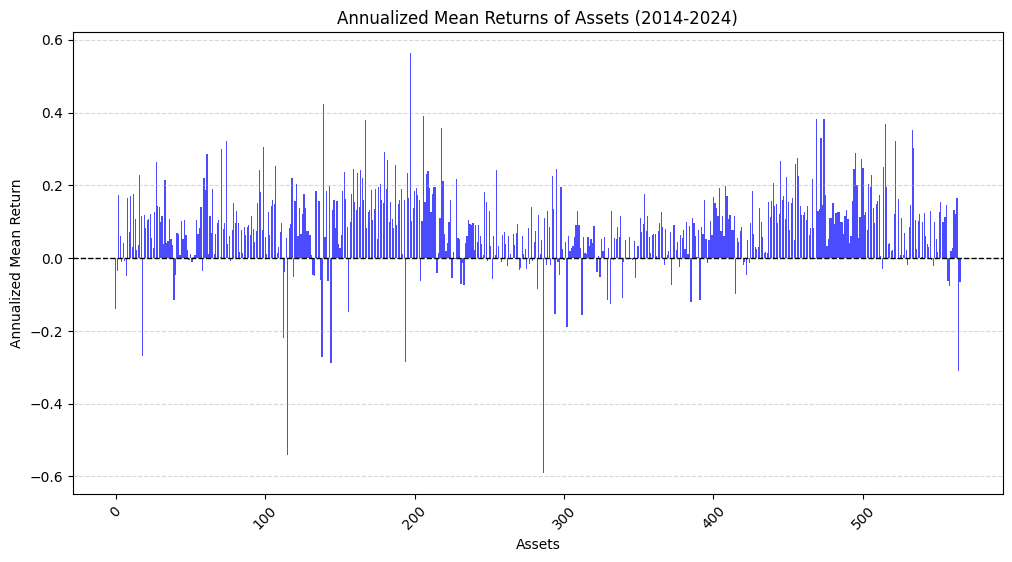

Mean Annualized Return Across Assets: 0.0839925177689467
Min Annualized Return: -0.5909090909090908
Max Annualized Return: 0.5633006519695752
Number of Negative Return Assets: 83


In [86]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Assuming `returns_data` is your dataframe with asset returns
# Step 1: Calculate annualized mean returns
annualized_returns = returns_data.mean() * 12

# Step 2: Create a bar plot to visualize returns of each asset
plt.figure(figsize=(12, 6))
plt.bar(annualized_returns.index, annualized_returns.values, alpha=0.7, color='blue')
plt.axhline(0, color='black', linewidth=1, linestyle='--')  # Zero return line for reference

# Labels and title
plt.xlabel("Assets")
plt.ylabel("Annualized Mean Return")
plt.title("Annualized Mean Returns of Assets (2014-2024)")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.5)

# Show plot
plt.show()

# Step 3: Print summary statistics
print("Mean Annualized Return Across Assets:", annualized_returns.mean())
print("Min Annualized Return:", annualized_returns.min())
print("Max Annualized Return:", annualized_returns.max())
print("Number of Negative Return Assets:", (annualized_returns < 0).sum())

In [87]:
import numpy as np
import scipy.optimize as sco
from tqdm import tqdm

num_portfolios = 15

mu_hat = np.array(simple_returns_M_2014_2024.T.mean() * 12)
Sigma = np.array(cov_matrix * 12)

num_assets = len(mu_hat)

# Define portfolio volatility and return functions
def port_vol(weights):
    return np.sqrt(weights.T @ Sigma @ weights)

def port_ret(weights):
    return mu_hat @ weights

# Constraints and bounds
bounds = [(0, None)] * num_assets

# Generate target returns
values = np.linspace(mv_r, mr_r, num_portfolios)

# Store results
target_returns = []
optimized_volatility = []

init_guess = np.array([1/num_assets] * num_assets)

# Iterate with tqdm for status bar
for mu_target in tqdm(values, desc='Optimizing Portfolios'):
    constraints = [
        {'type': 'eq', 'fun': lambda weights: np.sum(weights) - 1},
        {'type': 'ineq', 'fun': lambda weights, mu_target=mu_target: port_ret(weights) - mu_target}
    ]

    result = sco.minimize(port_vol, init_guess, method='SLSQP', bounds=bounds, constraints=constraints)

    if result.success:
        optimized_volatility.append(result.fun)
        target_returns.append(mu_target)
    else:
        print(f"Optimization failed for target return {mu_target}: {result.message}")

# Convert results to arrays
target_returns = np.array(target_returns)
optimized_volatility = np.array(optimized_volatility)

# Report any missing portfolios due to optimization failure
missing = num_portfolios - len(target_returns)
if missing:
    print(f"Missing {missing}/{num_portfolios} optimizations due to failure.")

print("Target Returns:", target_returns)
print("Optimized Volatility:", optimized_volatility)


Optimizing Portfolios: 100%|██████████| 15/15 [02:20<00:00,  9.40s/it]

Target Returns: [-2.43785504e-06  4.02334971e-02  8.04694321e-02  1.20705367e-01
  1.60941302e-01  2.01177237e-01  2.41413172e-01  2.81649107e-01
  3.21885042e-01  3.62120977e-01  4.02356912e-01  4.42592847e-01
  4.82828782e-01  5.23064717e-01  5.63300652e-01]
Optimized Volatility: [4.88635089e-05 2.11797790e-02 4.23589888e-02 6.35396366e-02
 8.47201373e-02 1.05899728e-01 1.27257151e-01 1.51922688e-01
 1.82223953e-01 2.18967288e-01 2.65588204e-01 3.24278219e-01
 3.98114093e-01 4.91422653e-01 6.06310130e-01]


In [88]:
# Calculate mean returns and covariance matrix for annualized data
mu_hat = np.array(simple_returns_M_2014_2024.T.mean() * 12)
Sigma = np.array(cov_matrix * 12)

num_assets = len(mu_hat)

# Define portfolio volatility and return functions
def port_vol(weights):
    return np.sqrt(weights.T @ Sigma @ weights)

def port_ret(weights):
    return mu_hat @ weights

# Constraints and bounds
bounds = [(0, None)] * num_assets

# Generate target returns
num_portfolios = 15
values = np.linspace(mv_r, mr_r, num_portfolios)

# Store results
target_returns = []
optimized_volatility = []
optimized_weights = []  # Store optimized weights for each portfolio

init_guess = np.array([1/num_assets] * num_assets)

# Iterate with tqdm for status bar
for mu_target in tqdm(values, desc='Optimizing Portfolios'):
    constraints = [
        {'type': 'eq', 'fun': lambda weights: np.sum(weights) - 1},
        {'type': 'ineq', 'fun': lambda weights, mu_target=mu_target: port_ret(weights) - mu_target}
    ]

    result = sco.minimize(port_vol, init_guess, method='SLSQP', bounds=bounds, constraints=constraints)

    if result.success:
        optimized_volatility.append(result.fun)
        target_returns.append(mu_target)
        optimized_weights.append(result.x)  # Store optimized weights
    else:
        print(f"Optimization failed for target return {mu_target}: {result.message}")

# Convert results to arrays
target_returns = np.array(target_returns)
optimized_volatility = np.array(optimized_volatility)
optimized_weights = np.array(optimized_weights)

# Report any missing portfolios due to optimization failure
missing = num_portfolios - len(target_returns)
if missing:
    print(f"Missing {missing}/{num_portfolios} optimizations due to failure.")

# Calculate ex-post annualized average return for each portfolio
ex_post_annualized_returns = np.array([port_ret(weights) for weights in optimized_weights])

# Calculate ex-post annualized volatility for each portfolio
ex_post_annualized_volatility = np.array([port_vol(weights) for weights in optimized_weights])

# Calculate ex-post annualized Sharpe ratio for each portfolio
risk_free_rate = 0.02  # Annual risk-free rate
ex_post_sharpe_ratios = (ex_post_annualized_returns - risk_free_rate) / ex_post_annualized_volatility

# Display results
print("Target Returns:", target_returns)
print("Optimized Volatility:", optimized_volatility)
print("Ex-post Annualized Returns:", ex_post_annualized_returns)
print("Ex-post Annualized Volatility:", ex_post_annualized_volatility)
print("Ex-post Annualized Sharpe Ratios:", ex_post_sharpe_ratios)

Optimizing Portfolios: 100%|██████████| 15/15 [02:21<00:00,  9.42s/it]

Target Returns: [-2.43785504e-06  4.02334971e-02  8.04694321e-02  1.20705367e-01
  1.60941302e-01  2.01177237e-01  2.41413172e-01  2.81649107e-01
  3.21885042e-01  3.62120977e-01  4.02356912e-01  4.42592847e-01
  4.82828782e-01  5.23064717e-01  5.63300652e-01]
Optimized Volatility: [4.88635089e-05 2.11797790e-02 4.23589888e-02 6.35396366e-02
 8.47201373e-02 1.05899728e-01 1.27257151e-01 1.51922688e-01
 1.82223953e-01 2.18967288e-01 2.65588204e-01 3.24278219e-01
 3.98114093e-01 4.91422653e-01 6.06310130e-01]
Ex-post Annualized Returns: [1.95223524e-05 4.02334971e-02 8.04694321e-02 1.20705367e-01
 1.60941302e-01 2.01177237e-01 2.41413172e-01 2.81649107e-01
 3.21885042e-01 3.62120977e-01 4.02356912e-01 4.42592847e-01
 4.82828782e-01 5.23064717e-01 5.63300651e-01]
Ex-post Annualized Volatility: [4.88635089e-05 2.11797790e-02 4.23589888e-02 6.35396366e-02
 8.47201373e-02 1.05899728e-01 1.27257151e-01 1.51922688e-01
 1.82223953e-01 2.18967288e-01 2.65588204e-01 3.24278219e-01
 3.98114093e-01

In [89]:
# Create a DataFrame from the calculated ex-post metrics
ex_post_df = pd.DataFrame({
    'Ex-post Annualized Return': ex_post_annualized_returns,
    'Ex-post Annualized Volatility': ex_post_annualized_volatility,
    'Ex-post Annualized Sharpe Ratio': ex_post_sharpe_ratios
})

# Display the DataFrame
ex_post_df

Ex-post Annualized Return  Ex-post Annualized Volatility  \
0                    0.000020                       0.000049   
1                    0.040233                       0.021180   
2                    0.080469                       0.042359   
3                    0.120705                       0.063540   
4                    0.160941                       0.084720   
5                    0.201177                       0.105900   
6                    0.241413                       0.127257   
7                    0.281649                       0.151923   
8                    0.321885                       0.182224   
9                    0.362121                       0.218967   
10                   0.402357                       0.265588   
11                   0.442593                       0.324278   
12                   0.482829                       0.398114   
13                   0.523065                       0.491423   
14                   0.563301                       0.606310   

    Ex-post Annualized Sharpe Ratio  
0                       -408.903865  
1                          0.955321  
2                          1.427547  
3                          1.584922  
4                          1.663610  
5                          1.710838  
6                          1.739888  
7                          1.722252  
8                          1.656670  
9                          1.562430  
10                         1.439661  
11                         1.303180  
12                         1.162553  
13                         1.023691  
14                         0.896077

In [90]:
# Convert the 'date' column to datetime objects if it's not already
risk_free_rate_df['date'] = pd.to_datetime(risk_free_rate_df['date'])

# Filter the DataFrame for the specified date range
start_date = pd.to_datetime('2014-01-01')
end_date = pd.to_datetime('2024-12-31')
filtered_df = risk_free_rate_df[(risk_free_rate_df['date'] >= start_date) & (risk_free_rate_df['date'] <= end_date)]

# Calculate the average risk-free rate
average_risk_free_rate = filtered_df['RF'].mean()

print(f"The average risk-free rate from 2014-01-01 to 2024-12-31 is: {average_risk_free_rate}")

The average risk-free rate from 2014-01-01 to 2024-12-31 is: 0.0012727272727272728


In [91]:
# Example asset return and covariance matrix (replace with real data)
expected_returns = np.array(simple_returns_M_2014_2024.T.mean() * 12)
cov_matrix = np.array(cov_matrix * 12)

rf_rate = average_risk_free_rate  # Annual risk-free rate

# Portfolio performance functions
def portfolio_return(weights):
    return np.dot(weights, expected_returns)

def portfolio_volatility(weights):
    return np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))

def sharpe_ratio(weights):
    return -(portfolio_return(weights) - rf_rate) / portfolio_volatility(weights)  # Negative for minimization

num_assets = len(expected_returns)
cons = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1})  # Constraint: Weights sum to 1
bounds = [(0, 1)] * num_assets  # Weights between 0 and 1 (long-only)
init_weights = np.array(num_assets * [1 / num_assets])  # Equal initial weights

opt_sharpe = sco.minimize(sharpe_ratio, init_weights, method='SLSQP', bounds=bounds, constraints=cons)

# Extract optimal weights
opt_weights = opt_sharpe.x
opt_return = portfolio_return(opt_weights)
opt_volatility = portfolio_volatility(opt_weights)
opt_sharpe_ratio = -opt_sharpe.fun  # Convert back to positive

# Print results
print("Optimal Portfolio Weights:", opt_weights)
print("Expected Return:", opt_return)
print("Expected Volatility:", opt_volatility)
print("Sharpe Ratio:", opt_sharpe_ratio)

Optimal Portfolio Weights: [9.93274655e-14 6.57957807e-14 6.14149613e-14 8.03359797e-14
 1.12040500e-13 8.39660081e-14 7.30589840e-14 1.62175930e-15
 3.37563821e-14 3.37369797e-14 2.83721873e-14 1.47435387e-13
 1.09620492e-13 6.88922212e-14 6.66655534e-14 6.47838547e-14
 8.36397406e-14 7.49232476e-15 2.52514119e-13 1.76802150e-13
 2.43109647e-13 2.36722118e-13 4.12363495e-14 1.77197633e-14
 2.24464637e-13 2.98073642e-13 4.55928313e-14 1.11145868e-13
 2.47232383e-14 2.91721028e-13 2.65489686e-13 2.22922143e-14
 8.09594516e-14 5.92059828e-14 4.26017686e-14 2.26242219e-14
 3.02559905e-13 2.37947333e-14 1.84615011e-13 2.54500044e-14
 8.60761573e-14 2.01570749e-13 4.18987698e-15 4.11862659e-14
 8.74018003e-14 2.15338383e-13 1.54470312e-13 4.59115625e-14
 9.62807530e-15 3.04061540e-15 5.20976518e-14 1.03668175e-13
 4.02651130e-14 1.07806504e-13 7.26402722e-14 4.05891201e-14
 2.43592900e-13 3.11595998e-13 7.45589145e-14 1.79297342e-13
 2.77919155e-13 1.66389995e-14 2.20007557e-13 2.47946004e-

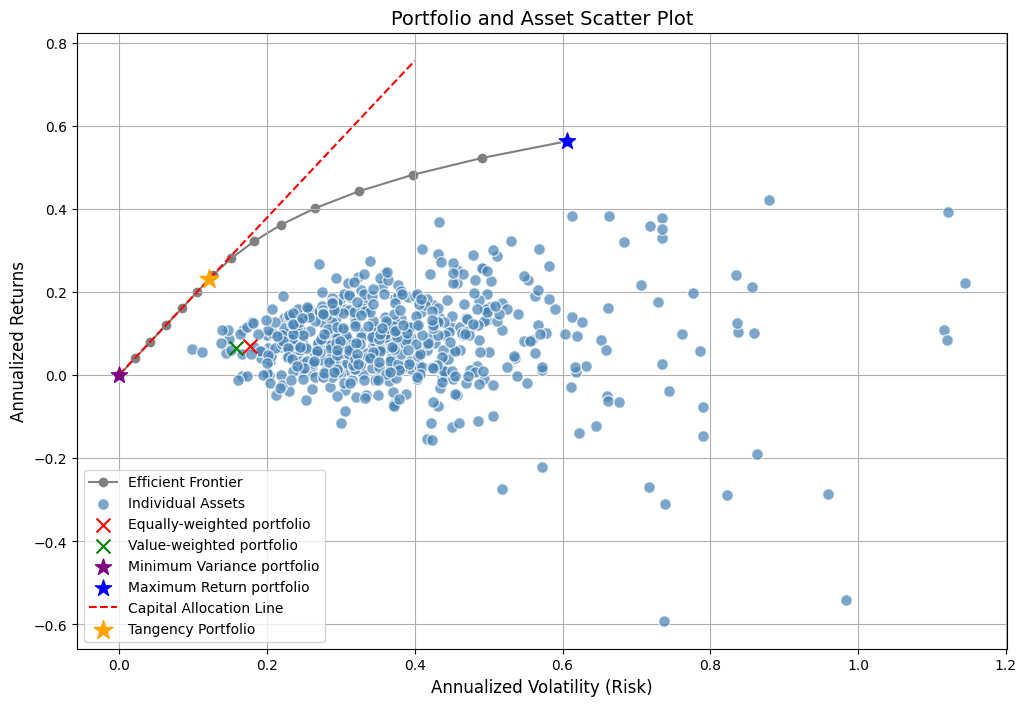

In [92]:
import matplotlib.pyplot as plt
import numpy as np
import numpy as np
import matplotlib.pyplot as plt
#from pypfopt.efficient_frontier import EfficientFrontier
#from pypfopt.risk_models import CovarianceShrinkage
#from pypfopt.expected_returns import mean_historical_return
#from pypfopt.cla import CLA
#from pypfopt.plotting import plot_efficient_frontier, plot_weights

# Annualized returns and volatility for individual assets
asset_returns = returns_data.mean() * 12
asset_volatility = returns_data.std() * np.sqrt(12)

df = simple_returns_M_2014_2024.T
df.index = pd.to_datetime(df.index)

mu = df.mean()*12
S = df.cov()*12

#ef = EfficientFrontier(mu, S, weight_bounds=(0, 1), solver=None, verbose=False, solver_options=None)

# Create figure and axis
fig, ax = plt.subplots(figsize=(12, 8))

#plot_efficient_frontier(ef, ax=ax, show_assets=False)
#frontier_line = ax.lines[0]  # efficient frontier is typically the first line
#frontier_line.set_color('black')

# Efficient frontier (lowest layer)
ax.plot(optimized_volatility, target_returns, marker='o', linestyle='-',
        linewidth=1.5, color='grey', label='Efficient Frontier', zorder=1)

# Individual assets (above the efficient frontier)
ax.scatter(asset_volatility, asset_returns,
           marker='o', s=70, color='steelblue', alpha=0.7,
           edgecolors='w', linewidths=1, label='Individual Assets', zorder=2)

# Equally-weighted portfolio
ax.scatter(summary_df.iloc[0, 4], summary_df.iloc[0, 1],
           marker='x', s=100, c='red', label='Equally-weighted portfolio', zorder=3)

# Value-weighted portfolio
ax.scatter(summary_df.iloc[1, 4], summary_df.iloc[1, 1],
           marker='x', s=100, c='green', label='Value-weighted portfolio', zorder=3)

# Minimum variance portfolio
ax.scatter(mv_v, mv_r,
           marker='*', s=150, c='purple', label='Minimum Variance portfolio', zorder=4)

# Maximum return portfolio
ax.scatter(mr_v, mr_r,
           marker='*', s=150, c='blue', label='Maximum Return portfolio', zorder=4)


x_cal = np.linspace(0, 0.4, 100)  # Extend CAL beyond the efficient frontier
y_cal = rf_rate + (opt_sharpe_ratio * x_cal)  # Equation of the CAL

plt.plot(x_cal, y_cal, label="Capital Allocation Line", linestyle='dashed', color='red')

# Plot Tangency Portfolio (Optimal Portfolio)
plt.scatter(opt_volatility, opt_return, marker="*", color="orange", s=200, label="Tangency Portfolio", zorder=5)




# Set titles and labels
ax.set_title("Portfolio and Asset Scatter Plot", fontsize=14)
ax.set_xlabel("Annualized Volatility (Risk)", fontsize=12)
ax.set_ylabel("Annualized Returns", fontsize=12)

# Add legend
ax.legend()

# Display the plot
plt.grid(True)
plt.show()


### Efficient frontier

## Question 4: Minimum variance portfolio (40 points)

### MERGING RETURNS TABLE AND ESCORE TABLE FOR EM COUNTRIES

In [93]:
#MEEEEEERGE

# Merging the EScore to EM, from 2003 to 2023

# Merging the data to filter per region
merged_DS_EScore_Y = pd.merge(DS_EScore_Y, Static, on='ISIN', how='inner')
merged_DS_EScore_Y = merged_DS_EScore_Y[['ISIN', 'Name', 'Region'] + [col for col in merged_DS_EScore_Y.columns if col not in ['ISIN', 'Name', 'Region', 'NAME']]]

#Keeping only the columns between 31/12/03 and 31/12/23
start_date = pd.to_datetime('2002-12-31')
end_date = pd.to_datetime('2023-12-31')

# Filter columns excluding non-date columns
date_columns = [col for col in merged_DS_EScore_Y.columns if col not in ['ISIN', 'Name', 'Country', 'Region'] and start_date <= pd.to_datetime(col, errors='ignore') <= end_date]
selected_columns = ['ISIN', 'Name', 'Country', 'Region'] + date_columns
merged_DS_EScore_Y = merged_DS_EScore_Y[selected_columns]


# Filter on EM countries
EM_merged_DS_EScore_Y = merged_DS_EScore_Y[merged_DS_EScore_Y['Region'] == 'EM']
EM_merged_DS_EScore_Y

<ipython-input-93-0a9241ab74ab>:14: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_datetime without passing `errors` and catch exceptions explicitly instead
  date_columns = [col for col in merged_DS_EScore_Y.columns if col not in ['ISIN', 'Name', 'Country', 'Region'] and start_date <= pd.to_datetime(col, errors='ignore') <= end_date]


ISIN                                Name Country Region  2003  \
1     ARALUA010258                               ALUAR      AR     EM   NaN   
2     ARP125991090                BANCO BBVA ARGENTINA      AR     EM   NaN   
3     ARSIDE010029  TERNIUM ARGENTINA SOCIEDAD ANONIMA      AR     EM   NaN   
118   BMG211591018              CHINA YURUN FOOD GROUP      CN     EM   NaN   
145   BRABEVACNOR1                            AMBEV ON      BR     EM   NaN   
...            ...                                 ...     ...    ...   ...   
2503  ZAE000191342                    ALTRON LIMITED A      ZA     EM   NaN   
2504  ZAE000255915                          ABSA GROUP      ZA     EM   NaN   
2505  ZAE000298253              NORTHAM PLATINUM HLDGS      ZA     EM   NaN   
2506  ZAE000302618                               AVENG      ZA     EM   NaN   
2507  ZAE000322095                              NAMPAK      ZA     EM   NaN   

      2004  2005  2006  2007   2008  ...   2014   2015   2016   2017   2018  \
1      NaN   NaN   NaN   NaN    NaN  ...    NaN    NaN    NaN  15.82  13.26   
2      NaN   NaN   NaN   NaN    NaN  ...    NaN    NaN  51.51  56.64  76.16   
3      NaN   NaN   NaN   NaN    NaN  ...    NaN    NaN  32.51  33.47  33.72   
118    NaN   NaN   NaN   NaN    NaN  ...   0.00   0.00  17.85  36.12  45.19   
145    NaN   NaN   NaN   NaN    NaN  ...  58.81  66.63  74.17  67.08  55.27   
...    ...   ...   ...   ...    ...  ...    ...    ...    ...    ...    ...   
2503   NaN   NaN   NaN   NaN    NaN  ...  54.31  56.78  59.55  57.53  30.93   
2504   NaN   NaN   NaN   NaN  55.21  ...  55.56  68.94  75.90  81.90  80.63   
2505   NaN   NaN   NaN   NaN    NaN  ...  54.03  52.42  56.64  53.90  63.37   
2506   NaN   NaN   NaN   NaN    NaN  ...  64.66  69.09  70.85  52.33  45.73   
2507   NaN   NaN   NaN   NaN    NaN  ...  53.84  48.90  30.93  32.58  34.06   

       2019   2020   2021   2022   2023  
1     12.26  11.05  13.19  12.21  17.65  
2     84.68  82.48  88.36  86.99  79.68  
3     33.41  33.52  38.37  36.83  48.05  
118   48.35  52.97  63.43  53.70  47.78  
145   68.85  72.11  77.48  67.51  62.78  
...     ...    ...    ...    ...    ...  
2503  30.08  27.51  38.62  31.87  37.06  
2504  83.03  81.99  81.45  79.12  84.75  
2505  62.03  67.79  73.50  74.37  63.96  
2506  44.32  44.52  48.95  31.21  25.61  
2507  23.19  29.18  32.98  32.27  28.72  

[675 rows x 25 columns]

In [94]:
#FILTERING ONLY FIRMS WITH AN E SCORE FROM 2013 ON

# Remplacer les chaînes de caractères "NaN" par np.nan
EM_merged_DS_EScore_Y = EM_merged_DS_EScore_Y.replace('NaN', np.nan)
EM_merged_DS_EScore_Y = EM_merged_DS_EScore_Y.replace(0, np.nan)

# Convert date columns to datetime if they are not already
date_columns = EM_merged_DS_EScore_Y.columns[4:]  # Assuming 'ISIN', 'Name', 'Country', 'Region' are the first 4 columns
EM_merged_DS_EScore_Y.columns = EM_merged_DS_EScore_Y.columns[:4].tolist() + pd.to_datetime(date_columns, errors='coerce').tolist()

# Select columns from 2013 onwards
start_date = pd.to_datetime('2013-12-31')
date_columns_2013_onwards = [col for col in EM_merged_DS_EScore_Y.columns
                             if isinstance(col, pd.Timestamp) and col >= start_date]

# Filter for rows with no NaN values in the selected columns
EM_merged_DS_EScore_Y = EM_merged_DS_EScore_Y[
    EM_merged_DS_EScore_Y[date_columns_2013_onwards].notna().all(axis=1)
]
EM_merged_DS_EScore_Y

ISIN                    Name Country Region  \
145   BRABEVACNOR1                AMBEV ON      BR     EM   
146   BRBBASACNOR3      BANCO DO BRASIL ON      BR     EM   
147   BRBBDCACNPR8       BANCO BRADESCO PN      BR     EM   
148   BRBRFSACNOR8     BRF BRASIL FOODS ON      BR     EM   
149   BRBRKMACNPA4            BRASKEM PN A      BR     EM   
...            ...                     ...     ...    ...   
2503  ZAE000191342        ALTRON LIMITED A      ZA     EM   
2504  ZAE000255915              ABSA GROUP      ZA     EM   
2505  ZAE000298253  NORTHAM PLATINUM HLDGS      ZA     EM   
2506  ZAE000302618                   AVENG      ZA     EM   
2507  ZAE000322095                  NAMPAK      ZA     EM   

      2003-01-01 00:00:00  2004-01-01 00:00:00  2005-01-01 00:00:00  \
145                   NaN                  NaN                  NaN   
146                   NaN                  NaN                  NaN   
147                   NaN                  NaN                  NaN   
148                   NaN                  NaN                  NaN   
149                   NaN                  NaN                  NaN   
...                   ...                  ...                  ...   
2503                  NaN                  NaN                  NaN   
2504                  NaN                  NaN                  NaN   
2505                  NaN                  NaN                  NaN   
2506                  NaN                  NaN                  NaN   
2507                  NaN                  NaN                  NaN   

      2006-01-01 00:00:00  2007-01-01 00:00:00  2008-01-01 00:00:00  ...  \
145                   NaN                  NaN                  NaN  ...   
146                   NaN                  NaN                72.84  ...   
147                   NaN                74.11                91.58  ...   
148                   NaN                  NaN                  NaN  ...   
149                   NaN                  NaN                  NaN  ...   
...                   ...                  ...                  ...  ...   
2503                  NaN                  NaN                  NaN  ...   
2504                  NaN                  NaN                55.21  ...   
2505                  NaN                  NaN                  NaN  ...   
2506                  NaN                  NaN                  NaN  ...   
2507                  NaN                  NaN                  NaN  ...   

      2014-01-01 00:00:00  2015-01-01 00:00:00  2016-01-01 00:00:00  \
145                 58.81                66.63                74.17   
146                 90.21                91.78                94.54   
147                 83.16                88.79                95.72   
148                 78.70                75.73                77.90   
149                 41.05                44.03                43.06   
...                   ...                  ...                  ...   
2503                54.31                56.78                59.55   
2504                55.56                68.94                75.90   
2505                54.03                52.42                56.64   
2506                64.66                69.09                70.85   
2507                53.84                48.90                30.93   

      2017-01-01 00:00:00  2018-01-01 00:00:00  2019-01-01 00:00:00  \
145                 67.08                55.27                68.85   
146                 94.64                94.43                94.44   
147                 96.06                96.32                95.57   
148                 77.55                77.98                72.71   
149                 50.40                53.56                49.96   
...                   ...                  ...                  ...   
2503                57.53                30.93                30.08   
2504                81.90                80.63                83.03   
2505                53.

In [95]:
# #KEEPING ONLY FIRMS, FROM THE RETURNS TABLE, WITH AN E SCORE FROM 2013 ON

# Create a list of ISINs present in EM_merged_DS_EScore_Y
isin_list = EM_merged_DS_EScore_Y['ISIN'].tolist()

# Filter EM_merged_DS_R_USD_M to keep only rows with ISINs present in the list
filtered_EM_merged_DS_R_USD_M = EM_merged_DS_R_USD_M[EM_merged_DS_R_USD_M['ISIN'].isin(isin_list)].copy()
filtered_EM_merged_DS_R_USD_M

ISIN                    Name Country Region  \
146   BRABEVACNOR1                AMBEV ON      BR     EM   
147   BRBBASACNOR3      BANCO DO BRASIL ON      BR     EM   
148   BRBBDCACNPR8       BANCO BRADESCO PN      BR     EM   
149   BRBRFSACNOR8     BRF BRASIL FOODS ON      BR     EM   
150   BRBRKMACNPA4            BRASKEM PN A      BR     EM   
...            ...                     ...     ...    ...   
2560  ZAE000191342        ALTRON LIMITED A      ZA     EM   
2561  ZAE000255915              ABSA GROUP      ZA     EM   
2562  ZAE000298253  NORTHAM PLATINUM HLDGS      ZA     EM   
2563  ZAE000302618                   AVENG      ZA     EM   
2564  ZAE000322095                  NAMPAK      ZA     EM   

      2004-01-30 00:00:00  2004-02-27 00:00:00  2004-03-31 00:00:00  \
146              0.009643             0.112451             0.307282   
147             -0.160357             0.091183             0.074352   
148             -0.061372             0.020959            -0.046010   
149              0.317106             0.002766             0.070504   
150             -0.008447             0.150683            -0.026802   
...                   ...                  ...                  ...   
2560            -0.064573             0.077699             0.098421   
2561            -0.007591             0.120405             0.054265   
2562             0.153425            -0.009501             0.026379   
2563            -0.065779            -0.087689             0.048295   
2564             0.004550             0.059169             0.051406   

      2004-04-30 00:00:00  2004-05-31 00:00:00  2004-06-30 00:00:00  ...  \
146              0.089657             0.056188             0.049650  ...   
147             -0.188388             0.035466             0.082495  ...   
148             -0.151264             0.045711             0.081756  ...   
149             -0.060311            -0.099105             0.042277  ...   
150             -0.235058            -0.239268             0.218490  ...   
...                   ...                  ...                  ...  ...   
2560            -0.062575             0.076836             0.137826  ...   
2561            -0.128764             0.140361             0.141200  ...   
2562            -0.170561             0.025352             0.010989  ...   
2563            -0.118338             0.126537             0.007731  ...   
2564            -0.025614             0.064032             0.095234  ...   

      2024-03-29 00:00:00  2024-04-30 00:00:00  2024-05-31 00:00:00  \
146             -0.014473            -0.060544            -0.061723   
147             -0.021737            -0.064611            -0.024629   
148              0.030787            -0.050563            -0.106172   
149              0.072827            -0.001119             0.085479   
150              0.245496            -0.221552            -0.124134   
...                   ...                  ...                  ...   
2560             0.082942             0.040944             0.127626   
2561            -0.082512             0.036311             0.025936   
2562             0.052891             0.113964             0.037187   
2563            -0.166667             0.000000             0.000000   
2564            -0.010616             0.113734             0.011561   

      2024-06-28 00:00:00  2024-07-31 00:00:00  2024-08-30 00:00:00  \
146             -0.066038            -0.002754             0.108466   
147             -0.044654            -0.023276             0.075064   
148             -0.069301            -0.004353             0.265222   
149              0.154542            -0.087171             0.243162   
150             -0.105816            -0.034452             0.026009   
...                   ...                  ...                  ...   
2560             0.080433             0.316925             0.012633   
2561             0.095224             0.012335             0.127532   
2562             0.0118

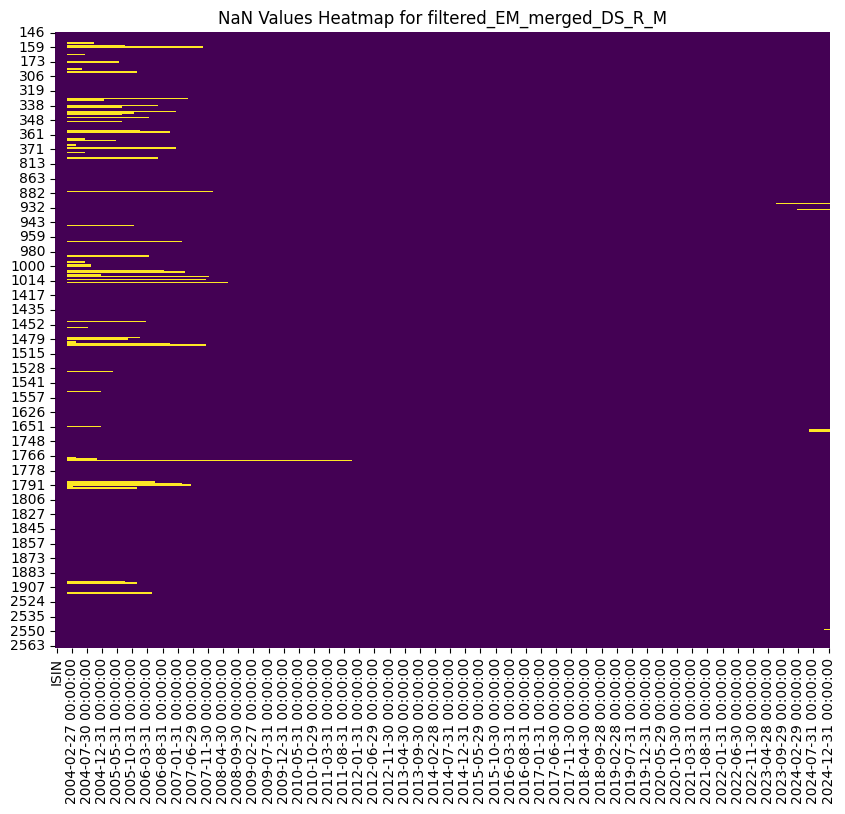

In [96]:
# CREATE HEATMAP OF NAN VALUES

filtered_EM_merged_DS_R_USD_M = filtered_EM_merged_DS_R_USD_M.replace('NaN', np.nan) #making sure the nan values are recognized as such
plt.figure(figsize=(10, 8))
sns.heatmap(filtered_EM_merged_DS_R_USD_M.isnull(), cbar=False, cmap='viridis')
plt.title('NaN Values Heatmap for filtered_EM_merged_DS_R_M')
plt.show()


### HATZOLD RULE: NAN VALUES BETWEEN 2014 AND 2024

In the following part, we will first try to identify which firms to get rid of because of missing values ( time frame: 2004-2024: correct? )

In [97]:
#WHERE ARE THE NAN VALUES SHERLOCK?

# Filter columns for 2014-2024
start_date = pd.to_datetime('2014-01-01')

# Select columns within the desired date range
date_columns_filtered = [col for col in filtered_EM_merged_DS_R_USD_M.columns[4:]
                        if pd.to_datetime(col, errors='coerce') >= start_date
                        and pd.notna(pd.to_datetime(col, errors='coerce'))]

# Filter the DataFrame to keep only the selected columns
filtered_EM_merged_DS_R_USD_M_filtered = filtered_EM_merged_DS_R_USD_M[['ISIN', 'Name', 'Country', 'Region'] + date_columns_filtered].copy()


# Now, find rows with NaN values within the filtered DataFrame
nan_rows = filtered_EM_merged_DS_R_USD_M_filtered[filtered_EM_merged_DS_R_USD_M_filtered.isna().any(axis=1)]

# Assign nan_rows to nan_rows_df
nan_rows_df = nan_rows #Assign the DataFrame

# Display the DataFrame containing the rows with NaN values
print("DataFrame with NaN rows:\n", nan_rows_df.to_string())

DataFrame with NaN rows:
               ISIN                                     Name Country Region  2014-01-31 00:00:00  2014-02-28 00:00:00  2014-03-31 00:00:00  2014-04-30 00:00:00  2014-05-30 00:00:00  2014-06-30 00:00:00  2014-07-31 00:00:00  2014-08-29 00:00:00  2014-09-30 00:00:00  2014-10-31 00:00:00  2014-11-28 00:00:00  2014-12-31 00:00:00  2015-01-30 00:00:00  2015-02-27 00:00:00  2015-03-31 00:00:00  2015-04-30 00:00:00  2015-05-29 00:00:00  2015-06-30 00:00:00  2015-07-31 00:00:00  2015-08-31 00:00:00  2015-09-30 00:00:00  2015-10-30 00:00:00  2015-11-30 00:00:00  2015-12-31 00:00:00  2016-01-29 00:00:00  2016-02-29 00:00:00  2016-03-31 00:00:00  2016-04-29 00:00:00  2016-05-31 00:00:00  2016-06-30 00:00:00  2016-07-29 00:00:00  2016-08-31 00:00:00  2016-09-30 00:00:00  2016-10-31 00:00:00  2016-11-30 00:00:00  2016-12-30 00:00:00  2017-01-31 00:00:00  2017-02-28 00:00:00  2017-03-31 00:00:00  2017-04-28 00:00:00  2017-05-31 00:00:00  2017-06-30 00:00:00  2017-07-31 00:00

In [98]:
#FILTERING NAN VALUES STEP 1: IDENTIFYING "SUSP" or "DELIST" CASES

# Access the company names
company_names = nan_rows_df['Name']

# Filter company names that do contain "SUSP" or "DELIST"
filtered_indices = company_names[company_names.str.contains("SUSP|DELIST", case=False, na=False)].index.tolist()
filtered_indices
num_selected_indices = len(filtered_indices)
print("Number of selected indices:", num_selected_indices)

Number of selected indices: 1


In [99]:
#FILTERING NAN VALUES STEP 2: IDENTIFYING FIRMS WE NEED TO GET RID OF

selected_rows = nan_rows_df.loc[filtered_indices]
nan_rows_df = nan_rows_df.drop(selected_rows.index) #removing the row with nan values that is from a delisted firm
nan_rows_df

ISIN                                     Name Country Region  \
928   INE001A01036  HOUSING DEVELOPMENT FINANCE CORPORATION      IN     EM   
1660  RU0007288411                       MMC NORILSK NICKEL      RU     EM   
1662  RU0007661625                                  GAZPROM      RU     EM   
2549  ZAE000073441                         MURRAY & ROBERTS      ZA     EM   

      2014-01-31 00:00:00  2014-02-28 00:00:00  2014-03-31 00:00:00  \
928              0.004372             0.024455             0.119625   
1660            -0.070390             0.089594             0.002980   
1662            -0.023704            -0.060319            -0.004441   
2549            -0.132535             0.048138             0.004531   

      2014-04-30 00:00:00  2014-05-30 00:00:00  2014-06-30 00:00:00  ...  \
928              0.005926            -0.003320             0.112157  ...   
1660             0.076715             0.062594             0.071892  ...   
1662            -0.063058             0.125081             0.075976  ...   
2549            -0.000850             0.031432            -0.051598  ...   

      2024-03-29 00:00:00  2024-04-30 00:00:00  2024-05-31 00:00:00  \
928                   NaN                  NaN                  NaN   
1660             0.020696             0.008713            -0.059271   
1662            -0.043806             0.028058            -0.198507   
2549            -0.019613            -0.011445             0.644767   

      2024-06-28 00:00:00  2024-07-31 00:00:00  2024-08-30 00:00:00  \
928                   NaN                  NaN                  NaN   
1660                  NaN                  NaN                  NaN   
1662                  NaN                  NaN                  NaN   
2549             0.137404                 0.44             0.027918   

      2024-09-30 00:00:00  2024-10-31 00:00:00  2024-11-29 00:00:00  \
928                   NaN                  NaN                  NaN   
1660                  NaN                  NaN                  NaN   
1662                  NaN                  NaN                  NaN   
2549            -0.046637            -0.240774                  NaN   

      2024-12-31 00:00:00  
928                   NaN  
1660                  NaN  
1662                  NaN  
2549                  NaN  

[4 rows x 136 columns]

In [100]:
#REMOVING THOSE ROWS FROM OUR TABLE

# Get the indices of rows in nan_rows_df
nan_rows_indices = nan_rows_df.index

# Drop those rows from filtered_EM_merged_DS_R_USD_M
filtered_EM_merged_DS_R_USD_M = filtered_EM_merged_DS_R_USD_M.drop(nan_rows_indices)

#visualizing on heat map
plt.figure(figsize=(10, 8))
sns.heatmap(filtered_EM_merged_DS_R_USD_M.isnull(), cbar=False, cmap='viridis')
plt.title('NaN Values Heatmap for filtered_EM_merged_DS_R_M after having removed some nan values')
plt.show()

In [101]:
#ASSIGNING RETURNS TO 0 FOR FIRMS THAT HAVE DELISTED

#filtered_EM_merged_DS_R_USD_M = filtered_EM_merged_DS_R_USD_M.fillna(0) #CAREFUL BECAUSE FIRST VALUE SHOULD BE -1 AND THEN WE ALLOCATE 0
#filtered_EM_merged_DS_R_USD_M

#visualizing on heat map
#plt.figure(figsize=(10, 8))
#sns.heatmap(filtered_EM_merged_DS_R_USD_M.isnull(), cbar=False, cmap='viridis')
#plt.title('NaN Values Heatmap for filtered_EM_merged_DS_R_M after having removed some nan values')
#plt.show()

### BICHE RULE: NAN VALUES BETWEEN 2003 AND 2013

In [102]:
#CLEANING NAN WITH THE BICHE RULE

def clean_data(dataframe):

    #Cleans the input DataFrame according to the specified rules:

    #1. If a row in 2014 does not have at least 5 years of prior data (no NaN values), it is deleted.
    #2. If there is a single missing value between existing data points, it is replaced with 0.
    #3. If a missing value appears after 2014, it is filled with the average value of the available period before the actual date.


    # Convert date columns to datetime format
    date_columns = dataframe.columns[4:]
    dataframe.columns = dataframe.columns[:4].tolist() + pd.to_datetime(date_columns, errors='coerce').tolist()

    dataframe = dataframe.copy()  # Avoid modifying original DataFrame

    # 1. Delete rows without 5 years of prior data in 2014
    try: # removed the try block
        year_2014_index = dataframe.columns.get_loc(pd.Timestamp('2014-12-31')) # fixed indentation
    except KeyError:
        print("Warning: '2014-12-31' not found in columns. Skipping step 1.")
        year_2014_index = None

    if year_2014_index is not None:
        prior_years = 5 * 12  # Assuming monthly data
        if year_2014_index >= prior_years:
            dataframe = dataframe[
                dataframe.iloc[:, year_2014_index - prior_years: year_2014_index].notna().sum(axis=1) == prior_years]

    # 2. Replace single missing values between existing data points with 0
    for index in range(len(dataframe)):
        row = dataframe.iloc[index, 4:]  # Extract only the date columns
        for i in range(1, len(row) - 1):
            if pd.isna(row.iloc[i]) and not pd.isna(row.iloc[i - 1]) and not pd.isna(row.iloc[i + 1]):
                dataframe.iloc[index, i + 4] = 0  # Offset by 4 to match original indexing

  # 3. Handle NaNs at the end of the row **only if they occur after 2014**
    if year_2014_index is not None:
       for index in range(len(dataframe)):
            row = dataframe.iloc[index, year_2014_index + 1:]  # Consider only post-2014 data
            nan_indices = row[row.isna()].index

            if not nan_indices.empty:
                first_nan_index = nan_indices[0]  # First NaN occurrence

                # Set first NaN to -1
                dataframe.iloc[index, dataframe.columns.get_loc(first_nan_index)] = -1

                # Fill remaining NaNs with 0
                dataframe.iloc[index, dataframe.columns.get_loc(first_nan_index) + 1:] = dataframe.iloc[index, dataframe.columns.get_loc(first_nan_index) + 1:].fillna(0)

    return dataframe

In [103]:
# Apply the cleaning function to our dataframe filtered_EM_merged_DS_R_USD_M

filtered_EM_merged_DS_R_USD_M = clean_data(filtered_EM_merged_DS_R_USD_M)
filtered_EM_merged_DS_R_USD_M


<ipython-input-102-d037b5986158>:51: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dataframe.iloc[index, dataframe.columns.get_loc(first_nan_index) + 1:] = dataframe.iloc[index, dataframe.columns.get_loc(first_nan_index) + 1:].fillna(0)


ISIN                    Name Country Region  \
146   BRABEVACNOR1                AMBEV ON      BR     EM   
147   BRBBASACNOR3      BANCO DO BRASIL ON      BR     EM   
148   BRBBDCACNPR8       BANCO BRADESCO PN      BR     EM   
149   BRBRFSACNOR8     BRF BRASIL FOODS ON      BR     EM   
150   BRBRKMACNPA4            BRASKEM PN A      BR     EM   
...            ...                     ...     ...    ...   
2560  ZAE000191342        ALTRON LIMITED A      ZA     EM   
2561  ZAE000255915              ABSA GROUP      ZA     EM   
2562  ZAE000298253  NORTHAM PLATINUM HLDGS      ZA     EM   
2563  ZAE000302618                   AVENG      ZA     EM   
2564  ZAE000322095                  NAMPAK      ZA     EM   

      2004-01-30 00:00:00  2004-02-27 00:00:00  2004-03-31 00:00:00  \
146              0.009643             0.112451             0.307282   
147             -0.160357             0.091183             0.074352   
148             -0.061372             0.020959            -0.046010   
149              0.317106             0.002766             0.070504   
150             -0.008447             0.150683            -0.026802   
...                   ...                  ...                  ...   
2560            -0.064573             0.077699             0.098421   
2561            -0.007591             0.120405             0.054265   
2562             0.153425            -0.009501             0.026379   
2563            -0.065779            -0.087689             0.048295   
2564             0.004550             0.059169             0.051406   

      2004-04-30 00:00:00  2004-05-31 00:00:00  2004-06-30 00:00:00  ...  \
146              0.089657             0.056188             0.049650  ...   
147             -0.188388             0.035466             0.082495  ...   
148             -0.151264             0.045711             0.081756  ...   
149             -0.060311            -0.099105             0.042277  ...   
150             -0.235058            -0.239268             0.218490  ...   
...                   ...                  ...                  ...  ...   
2560            -0.062575             0.076836             0.137826  ...   
2561            -0.128764             0.140361             0.141200  ...   
2562            -0.170561             0.025352             0.010989  ...   
2563            -0.118338             0.126537             0.007731  ...   
2564            -0.025614             0.064032             0.095234  ...   

      2024-03-29 00:00:00  2024-04-30 00:00:00  2024-05-31 00:00:00  \
146             -0.014473            -0.060544            -0.061723   
147             -0.021737            -0.064611            -0.024629   
148              0.030787            -0.050563            -0.106172   
149              0.072827            -0.001119             0.085479   
150              0.245496            -0.221552            -0.124134   
...                   ...                  ...                  ...   
2560             0.082942             0.040944             0.127626   
2561            -0.082512             0.036311             0.025936   
2562             0.052891             0.113964             0.037187   
2563            -0.166667             0.000000             0.000000   
2564            -0.010616             0.113734             0.011561   

      2024-06-28 00:00:00  2024-07-31 00:00:00  2024-08-30 00:00:00  \
146             -0.066038            -0.002754             0.108466   
147             -0.044654            -0.023276             0.075064   
148             -0.069301            -0.004353             0.265222   
149              0.154542            -0.087171             0.243162   
150             -0.105816            -0.034452             0.026009   
...                   ...                  ...                  ...   
2560             0.080433             0.316925             0.012633   
2561             0.095224             0.012335             0.127532   
2562             0.0118

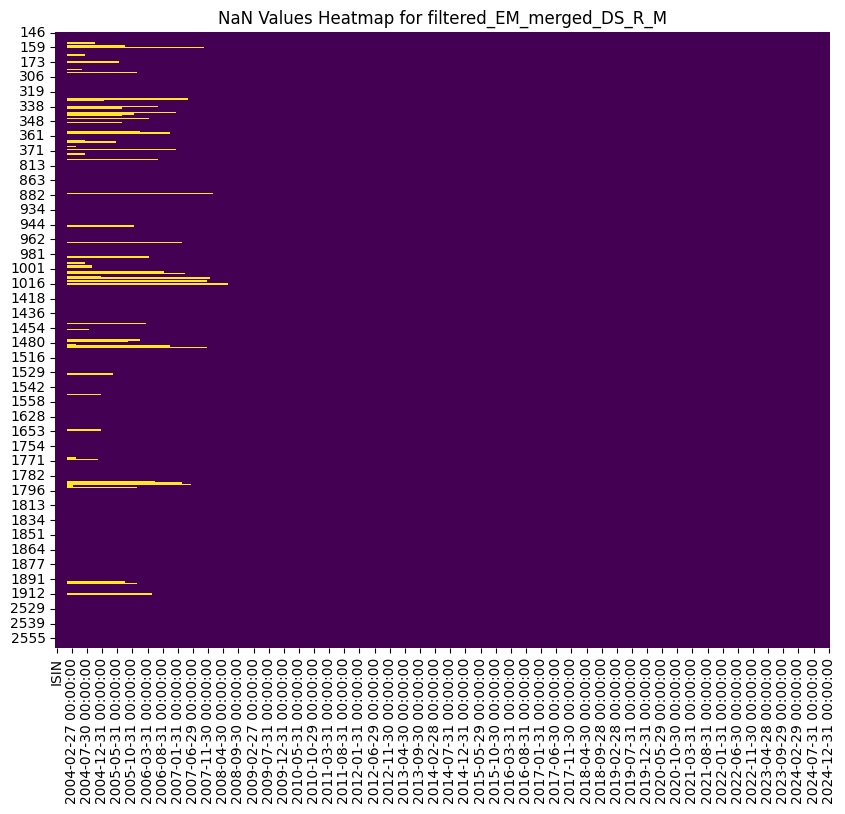

In [104]:
#Heat map for the NaN values in filtered_EM_merged_DS_R_M

# Create a heatmap of NaN values
plt.figure(figsize=(10, 8))
sns.heatmap(filtered_EM_merged_DS_R_USD_M.isnull(), cbar=False, cmap='viridis')
plt.title('NaN Values Heatmap for filtered_EM_merged_DS_R_M')
plt.show()

###REBALANCED PORTFOLIO


In [105]:
#WIDE TO LONG FORMAT FOR OUR DATAFRAME

long_filtered_EM_merged_DS_R_USD_M = pd.melt(filtered_EM_merged_DS_R_USD_M,
                        id_vars=['ISIN', 'Name', 'Country', 'Region'],  # Columns to keep as identifiers
                        var_name='Date',
                        value_name='Returns')

long_filtered_EM_merged_DS_R_USD_M['Date'] = pd.to_datetime(long_filtered_EM_merged_DS_R_USD_M['Date'])

# Display the long-format DataFrame
long_filtered_EM_merged_DS_R_USD_M.head()

ISIN                 Name Country Region       Date   Returns
0  BRABEVACNOR1             AMBEV ON      BR     EM 2004-01-30  0.009643
1  BRBBASACNOR3   BANCO DO BRASIL ON      BR     EM 2004-01-30 -0.160357
2  BRBBDCACNPR8    BANCO BRADESCO PN      BR     EM 2004-01-30 -0.061372
3  BRBRFSACNOR8  BRF BRASIL FOODS ON      BR     EM 2004-01-30  0.317106
4  BRBRKMACNPA4         BRASKEM PN A      BR     EM 2004-01-30 -0.008447

In [106]:
# INITIALIZATION for 2014 (2009-2013: 5 year window)

#Returns for 2014
filtered_initial = long_filtered_EM_merged_DS_R_USD_M.copy()
filtered_initial = filtered_initial[(filtered_initial['Date'] >= '2009-01-01') & (filtered_initial['Date'] < '2014-01-01')]

#Covariance matrix of 2014
cov_matrix_initial = filtered_initial.pivot(index='Date', columns='Name', values='Returns').cov()
cov_matrix_initial

Name                     AAC TECHNOLOGIES HDG.  ABOITIZ EQUITY VENT.  \
Name                                                                   
AAC TECHNOLOGIES HDG.                 0.016129              0.001409   
ABOITIZ EQUITY VENT.                  0.001409              0.010106   
ABSA GROUP                            0.002887              0.002859   
ACER                                  0.005199              0.002777   
ADANI ENTERPRISES                     0.008123              0.005354   
...                                        ...                   ...   
YUANTA SECURITIES KOREA               0.003636              0.002368   
ZHAOJIN MINING IND.'H'                0.005017              0.000791   
ZHEJIANG EXPRESSWAY 'H'               0.001093              0.001558   
ZIJIN MINING GROUP 'H'                0.003978              0.002526   
ZTE 'A'                               0.001423              0.001687   

Name                     ABSA GROUP      ACER  ADANI ENTERPRISES  \
Name                                                               
AAC TECHNOLOGIES HDG.      0.002887  0.005199           0.008123   
ABOITIZ EQUITY VENT.       0.002859  0.002777           0.005354   
ABSA GROUP                 0.008264  0.004100           0.006947   
ACER                       0.004100  0.012350           0.005955   
ADANI ENTERPRISES          0.006947  0.005955           0.040646   
...                             ...       ...                ...   
YUANTA SECURITIES KOREA    0.005004  0.008031           0.011758   
ZHAOJIN MINING IND.'H'     0.002066  0.003303           0.003939   
ZHEJIANG EXPRESSWAY 'H'    0.002284  0.004204           0.004015   
ZIJIN MINING GROUP 'H'     0.003973  0.003646           0.007973   
ZTE 'A'                    0.002489  0.004843           0.001829   

Name                     ADANI PORTS AND SEZ.  ADVANCED INFO SER.  ADVANTECH  \
Name                                                                           
AAC TECHNOLOGIES HDG.                0.005719            0.001527   0.002805   
ABOITIZ EQUITY VENT.                 0.002057           -0.000834   0.000552   
ABSA GROUP                           0.003010            0.001409   0.002738   
ACER                                 0.002589            0.000317   0.003700   
ADANI ENTERPRISES                    0.020020           -0.000234   0.002832   
...                                       ...                 ...        ...   
YUANTA SECURITIES KOREA              0.007180            0.000409   0.004203   
ZHAOJIN MINING IND.'H'               0.004175            0.000457   0.000453   
ZHEJIANG EXPRESSWAY 'H'              0.001090           -0.000967   0.002162   
ZIJIN MINING GROUP 'H'               0.003845           -0.000249   0.003184   
ZTE 'A'                             -0.000658           -0.000353   0.001074   

Name                     AFRICAN RAINBOW MINERALS  AGILE GROUP HDG.  ...  \
Name                                                                 ...   
AAC TECHNOLOGIES HDG.                    0.001482          0.011089  ...   
ABOITIZ EQUITY VENT.                     0.003006          0.003303  ...   
ABSA GROUP                               0.006176          0.009959  ...   
ACER                                     0.003877          0.006158  ...   
ADANI ENTERPRISES                        0.005390          0.018513  ...   
...                                           ...               ...  ...   
YUANTA SECURITIES KOREA                  0.006120          0.013829  ...   
ZHAOJIN MINING IND.'H'                   0.007146          0.009758  ...   
ZHEJIANG EXPRESSWAY 'H'                  0.001983          0.003853  ...   
ZIJIN MINING GROUP 'H'                   0.007671          0.014929  ...   
ZTE 'A'                                  0.003272          0.002341  ...   

Name                     YANG MING MAR.TRAN.  \
Name                                           
AAC TECHNOLOGIES HDG.               0.005660   
ABOI

In [107]:
# INITIALIZATION OF WEIGHTS for 2014 (2009-2013: 5 year window): just for visualization

# Objective function: portfolio variance
def portfolio_variance(weights, cov_matrix):
    return np.dot(weights.T, np.dot(cov_matrix,weights))

# Number of assets
num_assets = len(cov_matrix_initial)

# Assuming every asset have the same weights
init_guess = num_assets * [1. / num_assets]

# Constraint 1: sum of weights is 1
constraints = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1})

# Constraint 2: weights can only take values between 0 and 1
bounds = tuple((0, 1) for asset in range(num_assets))

# Optimization: minimize the portfolio variance
portfolio_initial = minimize(portfolio_variance, init_guess, args=(cov_matrix_initial,), method='SLSQP', bounds=bounds, constraints=constraints)

# Optimized weights
initial_weights = portfolio_initial.x

# Display the optimized weights
initial_weights

array([0.00000000e+00, 6.66254714e-03, 1.57747290e-19, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 1.13142582e-17, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 8.38388054e-19,
       0.00000000e+00, 5.10754303e-19, 4.51155440e-19, 3.09064503e-20,
       1.63467296e-19, 8.90691745e-19, 6.11143573e-19, 0.00000000e+00,
       4.59045393e-19, 0.00000000e+00, 6.63487314e-19, 1.74163411e-18,
       2.81528476e-19, 3.86396603e-18, 2.73742713e-19, 7.90302663e-20,
       0.00000000e+00, 2.93629404e-19, 0.00000000e+00, 1.58695113e-19,
       4.47334704e-19, 0.00000000e+00, 1.72604752e-18, 1.40535983e-19,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 2.67007165e-19, 0.00000000e+00, 1.99406554e-18,
       2.52763006e-19, 8.40730808e-01, 2.71271902e-19, 6.77681246e-19,
       6.08980051e-20, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       6.23275531e-19, 5.81462729e-19, 0.00000000e+00, 0.00000000e+00,
      

In [108]:
#COMPUTATION OF THE OPTIMIZED WEIGHTS

weights = []

for time in ['2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022', '2023', '2024']:
    start_date = pd.to_datetime(f'{time}-01-01') - pd.DateOffset(years=5)
    end_date = pd.to_datetime(f'{time}-01-01')
    rw_timeframe = long_filtered_EM_merged_DS_R_USD_M[(long_filtered_EM_merged_DS_R_USD_M['Date'] >= start_date) & (long_filtered_EM_merged_DS_R_USD_M['Date'] < end_date)]
    cov_matrix = rw_timeframe.pivot(index='Date', columns='Name', values='Returns').cov()
    num_assets = len(cov_matrix)
    constraints = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1})
    bounds = tuple((0, 1) for asset in range(num_assets))
    weights = num_assets * [1. / num_assets]
    portfolio = minimize(portfolio_variance, weights, args=(cov_matrix,), method='SLSQP', bounds=bounds, constraints=constraints)
    weights.append(portfolio.x)

In [109]:
#COMPUTATION OF THE FINAL PORTFOLIO

portfolio_final = pd.DataFrame()

for year in [2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024]:
    rw_timeframe = long_filtered_EM_merged_DS_R_USD_M[long_filtered_EM_merged_DS_R_USD_M['Date'].dt.year == year]
    names = pd.DataFrame(rw_timeframe['Name'].unique(), columns=['Name'])
    names['weight'] = weights[year-2014]
    merged = pd.merge(rw_timeframe, names, on='Name', how='outer')
    portfolio_final = pd.concat([portfolio_final, merged])

portfolio_final['weighted_returns'] = portfolio_final['Returns'] * portfolio_final['weight']

#Computation of the rebalanced portfolio
rebalanced = portfolio_final.groupby('Date')['weighted_returns'].sum().reset_index()
rebalanced


Date  weighted_returns
0   2014-01-31         -0.053919
1   2014-02-28          0.030170
2   2014-03-31          0.048443
3   2014-04-30          0.014317
4   2014-05-30          0.041928
..         ...               ...
127 2024-08-30          0.017350
128 2024-09-30          0.055178
129 2024-10-31         -0.051511
130 2024-11-29         -0.023346
131 2024-12-31         -0.020043

[132 rows x 2 columns]

###EVALUATION REBALANCED PORTFOLIO
1) annualized average return
<br> 2) annualized volatility
<br>3) Sharpe ratio
<br>4) minimum return and maximum return
<br>5) comparison table




In [110]:
# 1. annualised average return

total_return = (1 + rebalanced['weighted_returns']).prod() - 1  # Cumulative product of returns

# Step 2: Count total months in the dataset
N = len(rebalanced)

# Step 3: Annualize the return
rebalanced_annualized_return = (1 + total_return) ** (12 / N) - 1

print(f"Annualized weighted returns of the rebalanced weighted portfolio: {rebalanced_annualized_return:.6f}")

Annualized weighted returns of the rebalanced weighted portfolio: 0.082480


In [111]:
# 2. annualised volatility

rebalanced_volatility = rebalanced['weighted_returns'].std() * np.sqrt(12)

# Print results
print(f"Annualized volatility of the rebalanced weighted portfolio: {rebalanced_volatility}")

Annualized volatility of the rebalanced weighted portfolio: 0.177381962226133


In [112]:
# 3.1 sharpe ratio calculation

annualized_rf = Risk_Free_Rate['RF'].mean() / 100  * 12
rebalanced_sharpe= (rebalanced_annualized_return - annualized_rf)/ rebalanced_volatility

print(f"Sharpe Ratio: {rebalanced_sharpe:.4f}")

Sharpe Ratio: 0.3653


In [113]:
# 4.1 max return

max_rebalanced_return = rebalanced['weighted_returns'].max()
print(f"Maximum return in the weighted portfolio: {max_rebalanced_return}")

Maximum return in the weighted portfolio: 0.16932870130150132


In [114]:
# 4.2 min return

min_rebalanced_return = rebalanced['weighted_returns'].min()
print(f"Minimum return in the weighted portfolio: {min_rebalanced_return}")

Minimum return in the weighted portfolio: -0.21594620001705314


In [115]:
# COMPARISON
#Compare the RollingWindow portfolio w. Benchmark (Value weighted portfolio): #need code Danielle for this!got it!

data = {
    'Portfolio': ['Equally Weighted', 'Value Weighted'],
    'Annualized Return': [rebalanced_annualized_return, vw_annualized_return],  # Replace with actual values
    'Minimum Return': [min_rebalanced_return, min_vw_return],
    'Maximum Return': [max_rebalanced_return, max_vw_return],
    'Annualized Volatility': [rebalanced_volatility, vw_volatility_annualized],
    'Annualized Sharpe Ratio': [rebalanced_sharpe, vw_annualized_sharpe_ratio]
}

df = pd.DataFrame(data)
summary_df = df
summary_df

#add plot?

Portfolio  Annualized Return  Minimum Return  Maximum Return  \
0  Equally Weighted           0.082480       -0.215946        0.169329   
1    Value Weighted           0.065012       -0.164316        0.131147   

   Annualized Volatility  Annualized Sharpe Ratio  
0               0.177382                 0.365312  
1               0.158043                 0.380816